2020-0108:37884 IST 652 Scripting for Data Analysis
<br> Final Project - Sandra Tang & Emma Woods
<br> 03/15/2020


# 2019 Stack Overflow Survey Results

## Data Import, Exploration, and Pre-Processing

In [1]:
# Import libraries (ST)
import os
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

from numpy import median

from matplotlib.ticker import MaxNLocator
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

os.getcwd()

'/Users/emma/OneDrive - Syracuse University/IST652/Project/developer_survey_2019/PROJECT CODE'

In [2]:
# Load survey csv file into dataframe and inspect the data (ST)
surveyCSV = pd.read_csv('survey_results_public.csv')

print(type(surveyCSV))
print(surveyCSV.shape)
# print(surveyCSV.info())

<class 'pandas.core.frame.DataFrame'>
(88883, 85)


In [3]:
# Create a dataframe with a subset of the data for analysis (ST)
surveyDF = []
surveyDF = surveyCSV[['Respondent', 'MainBranch', 'Employment', 'Country', 'ConvertedComp', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Age', 'Gender']]

# Check nulls in Respondent
print(len(surveyCSV) - surveyCSV['Respondent'].count())

# Check uniqueness/dups in Respondent
print(len(surveyCSV['Respondent'].unique()))
print(len(surveyCSV) - surveyCSV['Respondent'].nunique())

# Reindex dataframe by Respondent
surveyDF.set_index('Respondent', inplace=True)

# Inspect the dataframe
print(type(surveyDF))
print(surveyDF.shape)
# print(surveyDF.info())

# Check for data completeness
surveyDF.isnull().sum()

0
88883
0
<class 'pandas.core.frame.DataFrame'>
(88883, 8)


MainBranch                  552
Employment                 1702
Country                     132
ConvertedComp             33060
LanguageWorkedWith         1314
LanguageDesireNextYear     4795
Age                        9673
Gender                     3477
dtype: int64

In [4]:
# Data Cleaning - Standardize responses for MainBranch as Role (ST)
MainBranch = []
for i in surveyDF['MainBranch']:
    if i == 'I am a developer by profession':
        MainBranch.append('Developer')
    elif i == 'I am a student who is learning to code':
        MainBranch.append('Student')
    elif i == 'I am not primarily a developer, but I write code sometimes as part of my work':
        MainBranch.append('Analyst')
    elif i == 'I code primarily as a hobby':
        MainBranch.append('Hobbyist') 
    elif i == 'I used to be a developer by profession, but no longer am':
        MainBranch.append('Ex-Developer')
    else:
        MainBranch.append('Unanswered')

print(len(MainBranch))
pd.Series(MainBranch).value_counts(dropna=False)

surveyDF.insert(loc=0, column='Role', value=MainBranch)
print(surveyDF.info())
surveyDF = surveyDF.drop(columns=['MainBranch'])
surveyDF['Role'].value_counts(dropna=False)

88883


Developer       65679
Student         10189
Analyst          7539
Hobbyist         3340
Ex-Developer     1584
Unanswered        552
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 9 columns):
Role                      88883 non-null object
MainBranch                88331 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
ConvertedComp             55823 non-null float64
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
Age                       79210 non-null float64
Gender                    85406 non-null object
dtypes: float64(2), object(7)
memory usage: 6.8+ MB
None


Developer       65679
Student         10189
Analyst          7539
Hobbyist         3340
Ex-Developer     1584
Unanswered        552
Name: Role, dtype: int64

In [5]:
# Data Cleaning - Standardize responses for Gender (ST)

# Create a fun that will convert the values
def clean_gender(row):
    if row['Gender'] == 'Woman':
        return 'Female'
    elif row['Gender'] == 'Man':
        return 'Male'
    elif row['Gender'] != row['Gender']:
        return 'Other/Unanswered'
    else:
        return 'Other/Unanswered'

# Check counts by Gender  
print(surveyDF['Gender'].value_counts(dropna=False))

# Create a new column and drop the old one
surveyDF = surveyDF.assign(Gender2=surveyDF.apply(clean_gender, axis=1))    
surveyDF = surveyDF.drop(columns=['Gender'])
surveyDF = surveyDF.rename(columns={"Gender2": "Gender"})

# Check counts by Gender (updated)
surveyDF['Gender'].value_counts(dropna=False)

Man                                                            77919
Woman                                                           6344
NaN                                                             3477
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64


Male                77919
Female               6344
Other/Unanswered     4620
Name: Gender, dtype: int64

In [6]:
# Create second dataframe with a subset of the data for analysis (EW)
surveyDF2 = surveyCSV[['Respondent', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'ConvertedComp', 'WorkWeekHrs','Age', 'Gender', 'Country', 'JobFactors']]
# Reindex by Respondent
surveyDF2.set_index('Respondent', inplace=True)

surveyDF2.shape

(88883, 10)

In [7]:
# Drop null values
surveyDF2 = surveyDF2.dropna()
surveyDF2.isnull().sum()

OrgSize          0
YearsCode        0
Age1stCode       0
YearsCodePro     0
ConvertedComp    0
WorkWeekHrs      0
Age              0
Gender           0
Country          0
JobFactors       0
dtype: int64

In [8]:
# recheck values
surveyDF2.shape

(51366, 10)

In [9]:
# Apply standardized response function to DF2
surveyDF2 = surveyDF2.assign(Gender2=surveyDF2.apply(clean_gender, axis=1))    
type(surveyDF2['Gender2'])
surveyDF2 = surveyDF2.drop(columns=['Gender'])
surveyDF2 = surveyDF2.rename(columns={"Gender2": "Gender"})
type(surveyDF2['Gender'])
surveyDF2['Gender'].value_counts()

pandas.core.series.Series

pandas.core.series.Series

Male                47293
Female               3506
Other/Unanswered      567
Name: Gender, dtype: int64

In [10]:
# Data cleaning - Create binned categories for Age (EW)
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '18-30', '30-40','40-50', '50-60', '70+']
surveyDF['Agebinned'] = pd.cut(surveyDF['Age'], bins=bins, labels=labels)
surveyDF2['Agebinned'] = pd.cut(surveyDF2['Age'], bins=bins, labels=labels)
print(surveyDF['Agebinned'])
print(surveyDF)

Respondent
1         0-18
2        18-30
3        18-30
4        18-30
5        18-30
         ...  
88377      NaN
88601      NaN
88802      NaN
88816      NaN
88863     0-18
Name: Agebinned, Length: 88883, dtype: category
Categories (6, object): [0-18 < 18-30 < 30-40 < 40-50 < 50-60 < 70+]
                  Role                                         Employment  \
Respondent                                                                  
1              Student             Not employed, and not looking for work   
2              Student                 Not employed, but looking for work   
3              Analyst                                 Employed full-time   
4            Developer                                 Employed full-time   
5            Developer                                 Employed full-time   
...                ...                                                ...   
88377       Unanswered             Not employed, and not looking for work   
88601       Un

In [11]:
# Data Cleaning - Standardize Age1stCode column (EW)
def clean_age_1st(row):
    if row['Age1stCode'] == 'Younger than 5 years':
        return '0'
    elif row['Age1stCode'] == 'Older than 85':
        return '85'
    else:
        return row['Age1stCode']
       
surveyDF2 = surveyDF2.assign(temp=surveyDF2.apply(clean_age_1st, axis=1))    
surveyDF2 = surveyDF2.drop(columns=['Age1stCode'])
surveyDF2 = surveyDF2.rename(columns={"temp": "Age1stCode"})
surveyDF2['Age1stCode'].head()
type(surveyDF2['Age1stCode'])

Respondent
3     22
4     16
9     11
13    11
14    16
Name: Age1stCode, dtype: object

pandas.core.series.Series

In [12]:
# Data Transformation - Convert Age1stCode column to numeric values 
surveyDF2['Age1stCode'] = pd.to_numeric(surveyDF2['Age1stCode'])
# Verify by checking data type of a value in Age1stCode column
type(surveyDF2['Age1stCode'][3])

numpy.int64

In [13]:
# Data Cleaning (EW)
# - standardize YearsCodePro column 

def clean_code_pro(row):
    if row['YearsCodePro'] == 'Less than 1 year':
        return '0'
    elif row['YearsCodePro'] == 'More than 50 years':
        return '51'
    else:
        return row['YearsCodePro']
       
surveyDF2 = surveyDF2.assign(temp=surveyDF2.apply(clean_code_pro, axis=1))    
surveyDF2 = surveyDF2.drop(columns=['YearsCodePro'])
surveyDF2 = surveyDF2.rename(columns={"temp": "YearsCodePro"})
surveyDF2['YearsCodePro'].head()
type(surveyDF2['YearsCodePro'])
surveyDF2['YearsCodePro'].value_counts()

Respondent
3     1
4     0
9     4
13    8
14    2
Name: YearsCodePro, dtype: object

pandas.core.series.Series

3     5501
2     5427
5     4606
4     4502
6     3275
10    3039
1     2886
7     2636
8     2484
0     2401
12    1582
9     1453
15    1415
20    1330
11    1239
13    1032
18     829
14     823
19     552
16     549
22     470
17     443
25     441
21     392
30     324
23     302
24     204
28     137
35     129
32     124
27     120
26     119
33      82
29      81
31      72
40      60
34      58
36      52
38      47
37      39
39      33
42      13
41      12
43      11
51      10
44       8
45       7
48       6
47       3
50       2
46       2
49       2
Name: YearsCodePro, dtype: int64

In [14]:
# Data Transformation (EW)
# - convert YearsCodePro column to numeric values

surveyDF2['YearsCodePro'] = pd.to_numeric(surveyDF2['YearsCodePro'])
type(surveyDF2['YearsCodePro'])

pandas.core.series.Series

In [15]:
# Data Transformation (EW)
# - convert OrgSize column to categorical variable

surveyDF2.OrgSize.astype('category')
type(surveyDF2['OrgSize'])

Respondent
3        100 to 499 employees
4        100 to 499 employees
9          10 to 19 employees
13         10 to 19 employees
14       100 to 499 employees
                 ...         
88877    500 to 999 employees
88878      20 to 99 employees
88879      20 to 99 employees
88881    100 to 499 employees
88883      20 to 99 employees
Name: OrgSize, Length: 51366, dtype: category
Categories (9, object): [1,000 to 4,999 employees, 10 to 19 employees, 10,000 or more employees, 100 to 499 employees, ..., 20 to 99 employees, 5,000 to 9,999 employees, 500 to 999 employees, Just me - I am a freelancer, sole proprietor, ...]

pandas.core.series.Series

In [16]:
# Data Transformation (EW)
# - create binned categories for YearsCodePro

bins = [0, 5, 10, 15, 20, 30, 40, 50]
labels = ['0-5', '5-10', '10-15','15-20', '20-30', '30-40', '50+']
surveyDF2['CodeProbinned'] = pd.cut(surveyDF2['YearsCodePro'], bins=bins, labels=labels)
print (surveyDF2['CodeProbinned'])

Respondent
3          0-5
4          NaN
9          0-5
13        5-10
14         0-5
         ...  
88877    20-30
88878      0-5
88879     5-10
88881     5-10
88883      0-5
Name: CodeProbinned, Length: 51366, dtype: category
Categories (7, object): [0-5 < 5-10 < 10-15 < 15-20 < 20-30 < 30-40 < 50+]


In [17]:
# Confirm counts in each bin category
surveyDF2['CodeProbinned'].value_counts()

0-5      22922
5-10     12887
10-15     6091
15-20     3703
20-30     2590
30-40      696
50+         66
Name: CodeProbinned, dtype: int64

In [18]:
# Data Transformation (EW)
# - separate job factors into 3 categories (maximum number of responses allowed on survey)

# put all into lowercase and split into two columns based on the " , "
# new data frame with split value columns 
jobfactors = surveyDF2["JobFactors"].str.lower().str.split(";", n = 3, expand = True)
jobfactors[:10] 
jobfactors.shape

,0,1,2
Respondent,,,
3,"languages, frameworks, and other technologies ...",remote work options,flex time or a flexible schedule
4,"languages, frameworks, and other technologies ...",office environment or company culture,opportunities for professional development
9,financial performance or funding status of the...,office environment or company culture,how widely used or impactful my work output wo...
13,"languages, frameworks, and other technologies ...",remote work options,flex time or a flexible schedule
14,"languages, frameworks, and other technologies ...",office environment or company culture,opportunities for professional development
16,"languages, frameworks, and other technologies ...",remote work options,flex time or a flexible schedule
17,"languages, frameworks, and other technologies ...",office environment or company culture,opportunities for professional development
19,"languages, frameworks, and other technologies ...",office environment or company culture,opportunities for professional development
20,remote work options,how widely used or impactful my work output wo...,flex time or a flexible schedule


(51366, 3)

In [19]:
# rename columns 
jobfactors.columns = ['factor1','factor2','factor3']
print(jobfactors.columns)
jobfactors[:2]

Index(['factor1', 'factor2', 'factor3'], dtype='object')


,factor1,factor2,factor3
Respondent,,,
3,"languages, frameworks, and other technologies ...",remote work options,flex time or a flexible schedule
4,"languages, frameworks, and other technologies ...",office environment or company culture,opportunities for professional development


In [20]:
# get counts for each job factor and sort

jobfactors_1 = (jobfactors['factor1'].value_counts())
jobfactors_1 = jobfactors_1.sort_index(ascending=True)
print(jobfactors_1)

diversity of the company or organization                                     95
financial performance or funding status of the company or organization     6099
flex time or a flexible schedule                                             32
how widely used or impactful my work output would be                         14
industry that i'd be working in                                            7206
languages, frameworks, and other technologies i'd be working with         20010
office environment or company culture                                      8571
opportunities for professional development                                 1013
remote work options                                                        3149
specific department or team i'd be working on                              5177
Name: factor1, dtype: int64


In [21]:
# counts for 2nd job factor 

jobfactors_2 = (jobfactors['factor2'].value_counts())
jobfactors_2 = jobfactors_2.sort_index(ascending=True)
print(jobfactors_2)

diversity of the company or organization                                   1502
financial performance or funding status of the company or organization      539
flex time or a flexible schedule                                            173
how widely used or impactful my work output would be                       3527
languages, frameworks, and other technologies i'd be working with          7752
office environment or company culture                                     14242
opportunities for professional development                                11274
remote work options                                                       10831
specific department or team i'd be working on                              1187
Name: factor2, dtype: int64


In [22]:
# get counts for 3rd job factor 

jobfactors_3 = (jobfactors['factor3'].value_counts())
jobfactors_3 = jobfactors_3.sort_index(ascending=True)
print(jobfactors_3)

diversity of the company or organization                              1873
flex time or a flexible schedule                                     24011
how widely used or impactful my work output would be                  8617
languages, frameworks, and other technologies i'd be working with      442
office environment or company culture                                 2688
opportunities for professional development                            9682
remote work options                                                   3083
specific department or team i'd be working on                           31
Name: factor3, dtype: int64


In [23]:
# merge series together into dataframe
jobfactors_df = pd.concat([jobfactors_1, jobfactors_2, jobfactors_3], axis=1).reset_index()
jobfactors_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,index,factor1,factor2,factor3
0,diversity of the company or organization,95,1502.0,1873.0
1,financial performance or funding status of the...,6099,539.0,NaN
2,flex time or a flexible schedule,32,173.0,24011.0
3,how widely used or impactful my work output wo...,14,3527.0,8617.0
4,industry that i'd be working in,7206,NaN,NaN
5,"languages, frameworks, and other technologies ...",20010,7752.0,442.0
6,office environment or company culture,8571,14242.0,2688.0
7,opportunities for professional development,1013,11274.0,9682.0
8,remote work options,3149,10831.0,3083.0
9,specific department or team i'd be working on,5177,1187.0,31.0


In [24]:
# replace "NaN" values with "0"
jobfactors_df = jobfactors_df.fillna(0)
jobfactors_df

,index,factor1,factor2,factor3
0,diversity of the company or organization,95,1502.0,1873.0
1,financial performance or funding status of the...,6099,539.0,0.0
2,flex time or a flexible schedule,32,173.0,24011.0
3,how widely used or impactful my work output wo...,14,3527.0,8617.0
4,industry that i'd be working in,7206,0.0,0.0
5,"languages, frameworks, and other technologies ...",20010,7752.0,442.0
6,office environment or company culture,8571,14242.0,2688.0
7,opportunities for professional development,1013,11274.0,9682.0
8,remote work options,3149,10831.0,3083.0
9,specific department or team i'd be working on,5177,1187.0,31.0


In [25]:
# Data Cleaning (EW)
# - standardize index values for graphing

# define function (NOTE: values including an apostrophe to be handled separately)
def clean_index(row):
    if row['index'] == 'diversity of the company or organization':
        return 'diversity'
    elif row['index'] == 'financial performance or funding status of the company or organization':
        return 'financial performance'
    elif row['index'] == 'flex time or a flexible schedule':
        return 'flex schedule'
    elif row['index'] == 'how widely used or impactful my work output would be':
        return 'impactful work'
    elif row['index'] == 'languages, frameworks, and other technologies id be working with':
        return 'technologies'
    elif row['index'] == 'office environment or company culture':
        return 'company culture'
    elif row['index'] == 'opportunities for professional development':
        return 'professional development'
    elif row['index'] == 'remote work options':
        return 'remote options'
    else:
        return row['index']

In [26]:
# apply function 
jobfactors_df = jobfactors_df.assign(temp=jobfactors_df.apply(clean_index, axis=1)) # assign to temp   
jobfactors_df = jobfactors_df.drop(columns=['index']) # drop original
jobfactors_df = jobfactors_df.rename(columns={"temp": "index"}) # rename temp
jobfactors_df['index'].head()

0                          diversity
1              financial performance
2                      flex schedule
3                     impactful work
4    industry that i'd be working in
Name: index, dtype: object

In [27]:
# convert values not included in function (due to apostrophes)
jobfactors_df = jobfactors_df.replace(to_replace ="specific department or team i'd be working on", value = "department")
jobfactors_df = jobfactors_df.replace(to_replace ="languages, frameworks, and other technologies i'd be working with", value = "technologies")
jobfactors_df = jobfactors_df.replace(to_replace ="industry that i'd be working in", value = "industry")
jobfactors_df

,factor1,factor2,factor3,index
0,95,1502.0,1873.0,diversity
1,6099,539.0,0.0,financial performance
2,32,173.0,24011.0,flex schedule
3,14,3527.0,8617.0,impactful work
4,7206,0.0,0.0,industry
5,20010,7752.0,442.0,technologies
6,8571,14242.0,2688.0,company culture
7,1013,11274.0,9682.0,professional development
8,3149,10831.0,3083.0,remote options
9,5177,1187.0,31.0,department


In [28]:
jobfactors_df

,factor1,factor2,factor3,index
0,95,1502.0,1873.0,diversity
1,6099,539.0,0.0,financial performance
2,32,173.0,24011.0,flex schedule
3,14,3527.0,8617.0,impactful work
4,7206,0.0,0.0,industry
5,20010,7752.0,442.0,technologies
6,8571,14242.0,2688.0,company culture
7,1013,11274.0,9682.0,professional development
8,3149,10831.0,3083.0,remote options
9,5177,1187.0,31.0,department


In [29]:
## Data Transformation
# - add new feature "Count Totals"

# apply function to sum each column
jobfactors_df['Count_Totals'] = jobfactors_df.apply(lambda row: row.factor1 + 
                                  row.factor2 + row.factor3 , axis = 1)
jobfactors_df

,factor1,factor2,factor3,index,Count_Totals
0,95,1502.0,1873.0,diversity,3470.0
1,6099,539.0,0.0,financial performance,6638.0
2,32,173.0,24011.0,flex schedule,24216.0
3,14,3527.0,8617.0,impactful work,12158.0
4,7206,0.0,0.0,industry,7206.0
5,20010,7752.0,442.0,technologies,28204.0
6,8571,14242.0,2688.0,company culture,25501.0
7,1013,11274.0,9682.0,professional development,21969.0
8,3149,10831.0,3083.0,remote options,17063.0
9,5177,1187.0,31.0,department,6395.0


## Developer Demographic Profiles

In [30]:
# Inspect dataframe
surveyDF.head()

,Role,Employment,Country,ConvertedComp,LanguageWorkedWith,LanguageDesireNextYear,Age,Gender,Agebinned
Respondent,,,,,,,,,
1,Student,"Not employed, and not looking for work",United Kingdom,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,14.0,Male,0-18
2,Student,"Not employed, but looking for work",Bosnia and Herzegovina,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,19.0,Male,18-30
3,Analyst,Employed full-time,Thailand,8820.0,HTML/CSS,Elixir;HTML/CSS,28.0,Male,18-30
4,Developer,Employed full-time,United States,61000.0,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,22.0,Male,18-30
5,Developer,Employed full-time,Ukraine,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,30.0,Male,18-30


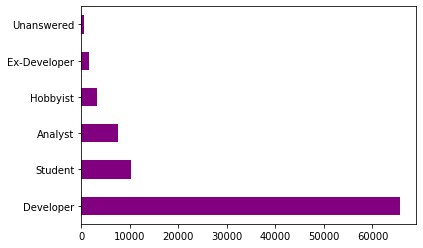

In [31]:
# Respondent counts by Role (MainBranch) - Chart
surveyDF['Role'].value_counts().plot(kind='barh', color='purple')

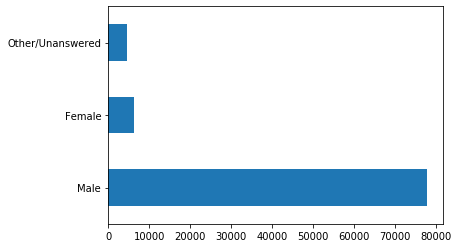

In [32]:
# Respondent counts by Gender - Chart
surveyDF['Gender'].value_counts().plot(kind='barh')

In [33]:
# Respondent counts by Role and Gender
pd.crosstab(surveyDF['Role'], surveyDF['Gender'], margins=True) #.sort_values('Male', ascending=False)

Gender,Female,Male,Other/Unanswered,All
Role,,,,
Analyst,670,6471,398,7539
Developer,4355,58371,2953,65679
Ex-Developer,138,1334,112,1584
Hobbyist,174,2883,283,3340
Student,945,8573,671,10189
Unanswered,62,287,203,552
All,6344,77919,4620,88883


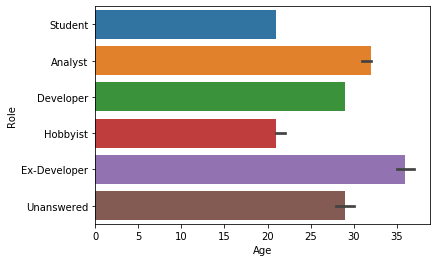

In [34]:
# Average Age by Role
sbn.barplot(x='Age', y='Role', data=surveyDF, estimator=median)

In [35]:
# Compare Age by Role and Gender
surveyDF.groupby(['Role', 'Gender'])['Age'].agg(['count','min', 'max', 'mean', 'median']).round(0).sort_values(by='count', ascending=False)

,,count,min,max,mean,median
Role,Gender,,,,,
Developer,Male,54350,1.0,99.0,31.0,29.0
Student,Male,7506,1.0,84.0,22.0,21.0
Analyst,Male,5902,1.0,99.0,34.0,32.0
Developer,Female,3970,1.0,85.0,30.0,28.0
Hobbyist,Male,2432,10.0,97.0,25.0,21.0
Developer,Other/Unanswered,1347,1.0,99.0,31.0,29.0
Ex-Developer,Male,1156,16.0,95.0,39.0,36.0
Student,Female,778,11.0,61.0,24.0,22.0
Analyst,Female,593,17.0,99.0,32.0,30.0


Country
United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Name: Role, dtype: int64


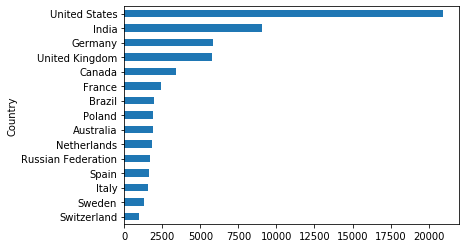

In [36]:
# Respondent counts by Country
byCountry = surveyDF.groupby('Country')['Role'].count().sort_values(ascending=False)[:15]
print(byCountry)
byCountry.sort_values(ascending=True).plot(kind='barh')

## Compensation by Developer Demographics


In [37]:
# Compare compensation and age by role and gender 
surveyDF.groupby(['Role','Gender']).mean().round(0).fillna(0).astype(int)

ConvertedComp  Age
Role         Gender                              
Analyst      Female                   120733   32
             Male                     129064   34
             Other/Unanswered         121957   32
Developer    Female                   113991   30
             Male                     127295   31
             Other/Unanswered         148161   31
Ex-Developer Female                        0   36
             Male                          0   39
             Other/Unanswered              0   39
Hobbyist     Female                        0   29
             Male                          0   25
             Other/Unanswered              0   24
Student      Female                        0   24
             Male                          0   22
             Other/Unanswered              0   23
Unanswered   Female                        0   35
             Male                          0   33
             Other/Unanswered              0   27

In [38]:
# Get the top countries where respondents are from
topCountries = surveyDF['Country'].value_counts()[:15]

# Get the total income for each country
totalComp = surveyDF.groupby('Country')['ConvertedComp'].sum()

# Compute the average salary for each country, slice by the top 15
compDF = (totalComp/topCountries).sort_values(ascending=False).round(0).fillna(0).astype(int)[:15].reset_index()
type(compDF)

# Rename columns
compDF.rename(columns={0:'Average Compensation (USD)','index':'Country'},inplace=True)

# Display the dataframe
compDF

pandas.core.frame.DataFrame

,Country,Average Compensation (USD)
0,United States,178455
1,Switzerland,118648
2,United Kingdom,116852
3,Australia,112408
4,Canada,89096
5,Germany,70367
6,Spain,66267
7,Netherlands,65233
8,France,56283
9,Sweden,54723


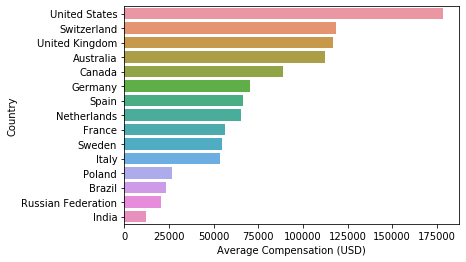

In [39]:
# Chart - Average income by top 15 countries
sbn.barplot(y='Country', x='Average Compensation (USD)', data = compDF)

In [40]:
# Comparison of average compensation by Country & Gender

# Create a dataframe to store the selection
topCompDF = surveyDF[surveyDF['Country'].isin(topCountries.keys())]

# Aggregate the data in group
topCompDF.groupby(['Country','Gender'])['ConvertedComp'].mean().round()

Country             Gender          
Australia           Female              131120.0
                    Male                171252.0
                    Other/Unanswered    247586.0
Brazil              Female               16808.0
                    Male                 33615.0
                    Other/Unanswered     17137.0
Canada              Female              102613.0
                    Male                135249.0
                    Other/Unanswered    182283.0
France              Female               91376.0
                    Male                 80768.0
                    Other/Unanswered     78192.0
Germany             Female               84725.0
                    Male                110950.0
                    Other/Unanswered     97967.0
India               Female               12893.0
                    Male                 28063.0
                    Other/Unanswered     59903.0
Italy               Female               42445.0
                    Male        

In [41]:
# Comparison of avg, min, max, count of compensation by Country & Gender
topCompDF.groupby(['Country', 'Gender']).agg({'ConvertedComp': ['mean', 'median','count','min', 'max']}).round(0)

ConvertedComp                            \
                                             mean    median  count      min   
Country            Gender                                                     
Australia          Female                131120.0   67018.0     69   9792.0   
                   Male                  171252.0   82322.0   1137      0.0   
                   Other/Unanswered      247586.0   76900.0     41      0.0   
Brazil             Female                 16808.0   13116.0     63      0.0   
                   Male                   33615.0   18036.0   1317      0.0   
                   Other/Unanswered       17137.0    9840.0     20    108.0   
Canada             Female                102613.0   58017.0    186   3120.0   
                   Male                  135249.0   68705.0   2001      0.0   
                   Other/Unanswered      182283.0   64888.0     70     37.0   
France             Female                 91376.0   44398.0     80  11450.0   
                   Male                   80768.0   46976.0   1535      0.0   
                   Other/Unanswered       78192.0   41247.0     42   6876.0   
Germany            Female                 84725.0   53850.0    182     48.0   
                   Male                  110950.0   63016.0   3471      0.0   
                   Other/Unanswered       97967.0   61872.0    125   7560.0   
India              Female                 12893.0    6216.0    203      0.0   
                   Male                   28063.0   10584.0   3700      0.0   
                   Other/Unanswered       59903.0    8398.0     96      0.0   
Italy              Female                 42445.0   30649.0     30   9828.0   
                   Male                   92025.0   36664.0    903      0.0   
                   Other/Unanswered       33896.0   22915.0     15      0.0   
Netherlands        Female                109061.0   46056.0     69   2850.0   
                   Male                  101306.0   59152.0   1100      0.0   
                   Other/Unanswered       63813.0   49212.0     29   3432.0   
Poland             Female                 29276.0   22440.0     75   3852.0   
                   Male                   39572.0   32064.0   1212      0.0   
                   Other/Unanswered       34654.0   27654.0     34      0.0   
Russian Federation Female                 38999.0   15126.0     54   4224.0   
                   Male                   30953.0   23832.0   1026      0.0   
                   Other/Unanswered       21524.0   21084.0     26   1528.0   
Spain              Female                 83076.0   35060.0     56     29.0   
                   Male                   89310.0   40101.0   1130      0.0   
                   Other/Unanswered       59935.0   36664.0     12  24634.0   
Sweden             Female                 54521.0   53028.0     45  11268.0   
                   Male                   78625.0   57000.0    837     60.0   
                   Other/Unanswered       58192.0   54996.0     25  15912.0   
Switzerland        Female                123848.0   74748.0     21   7836.0   
                   Male                  176041.0   96444.0    629      0.0   
                   Other/Unanswered      123058.0   84388.0     22   7236.0   
United Kingdom     Female                138109.0   57573.0    289      0.0   
                   Male                  168969.0   69349.0   3641      0.0   
                   Other/Unanswered      146650.0   67060.0    104  10468.0   
United States      Female                187551.0   99700.0   1452      0.0   
                   Male                  256864.0  114000.0  12985      0.0   
                   Other/Unanswered      240339.0  110500.0    544      0.0   

                                                
                                           max  
Country            Gender                       
Australia          Female            1000000.0  
                   Male              1000000.0 

## Age at Which Developers First Start Learning to Code 

In [42]:
# Analyze the age that respondents wrote their first line of code grouped by age and gender 
# First compute average for all survey respondents across age brackets

# Findings: In general, the 0-18 age group started coding at the youngest age (12) 
# Interestingly those in the 30-40 age bracket started coding at a slightly younger age than those that are 18-30
agegroup = surveyDF2.groupby('Agebinned')['Age1stCode'].mean()
print(agegroup)

Agebinned
0-18     12.321267
18-30    15.487228
30-40    14.898944
40-50    13.573548
50-60    16.932592
70+      20.676923
Name: Age1stCode, dtype: float64


In [43]:
# Include gender grouping to compare for differences 

firstcode_gender = surveyDF2['Age1stCode'].groupby([surveyDF2['Agebinned'],surveyDF2['Gender']]).mean()
print(firstcode_gender)

Agebinned  Gender          
0-18       Female              11.833333
           Male                12.024272
           Other/Unanswered    34.666667
18-30      Female              16.461468
           Male                15.423616
           Other/Unanswered    14.115282
30-40      Female              17.112936
           Male                14.765758
           Other/Unanswered    14.295775
40-50      Female              17.299180
           Male                13.371455
           Other/Unanswered    12.823529
50-60      Female              20.708333
           Male                16.740221
           Other/Unanswered    16.000000
70+        Female              22.400000
           Male                20.603239
           Other/Unanswered    21.000000
Name: Age1stCode, dtype: float64


In [44]:
# Create a pivot table that shows average age to start coding by gender and age bracket 

# Findings: 
# In all age brackets females start coding at a slightly older age than males, with the EXCEPTION of those aged 18-30
# This may indicate that girls are getting more interested in coding at a younger age and we will see a wave
# of female coders entering the profession!
codetable = (surveyDF2.pivot_table(index='Agebinned', columns='Gender', values='Age1stCode',
                aggfunc='mean', fill_value=0))
print(codetable)

Gender        Female       Male  Other/Unanswered
Agebinned                                        
0-18       11.833333  12.024272         34.666667
18-30      16.461468  15.423616         14.115282
30-40      17.112936  14.765758         14.295775
40-50      17.299180  13.371455         12.823529
50-60      20.708333  16.740221         16.000000
70+        22.400000  20.603239         21.000000


Text(0, 0.5, 'Age started to code')

Text(0.5, 1.0, 'Average age first started coding based on age and gender')

Text(0.5, 0, 'Gender')

AxesSubplot(0.125,0.125;0.775x0.755)


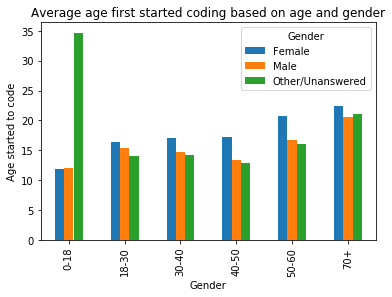

In [45]:
# Plot as a bar graph 

# NOTE: the bar graph shows a clear anomaly in the 18-30 age group "Other/unanswered" gender grouping
# Most likely indicates an anomaly or user enter error (the mean value is higher than the age group bracket!)
codeplot = codetable.plot.bar(stacked=False)

codeplot.set_ylabel('Age started to code')
codeplot.set_title('Average age first started coding based on age and gender')

codeplot.set_xlabel('Gender')

print(codeplot)

In [46]:
# Review standard deviation per age group (EW)

# Finding: the smallest deviation in age respondents started coding is in the 18-30 age group, which is likely to
# be the age group most populated within coding professions
agegroup = surveyDF2.groupby('Agebinned')['Age1stCode'].std()
type(agegroup)
print(agegroup)

pandas.core.series.Series

Agebinned
0-18     5.747802
18-30    3.785974
30-40    5.405736
40-50    5.767141
50-60    5.426873
70+      6.565048
Name: Age1stCode, dtype: float64


## Compensation Comparison According to Professional Coding Experience

In [47]:
### Compare salary ranges according to professional coding experience, grouped by organization size & country ###

# First review salary averages by country
# Findings: Overall, Liechtenstein reports the highest median salary. The US does not appear within the top 5 (or bottom 5!) 

salary_country_avgs = surveyDF2.groupby('Country')['ConvertedComp'].median().reset_index().rename(
    columns={'Country':'Country','ConvertedComp' : 'Median Salary'})

#print(salary_country_avgs)
salary_country_avgs.sort_values('Median Salary', ascending=False)

,Country,Median Salary
79,Liechtenstein,811188.0
118,San Marino,301788.0
140,Timor-Leste,229500.0
3,Andorra,171862.0
37,Democratic Republic of the Congo,110484.0
...,...,...
32,Cuba,3666.0
21,Burundi,3606.0
135,Syrian Arab Republic,2568.0
131,Sudan,2016.0


In [48]:
#### Review Respondent Counts by top 10 countries ###

# Findings: USA has by far the highest number of respondents in the survey. Liechtenstein does not make the top 10, indicating
# a high median salary by low number of respondents

surveyDF2['Country'].value_counts()[:10]

United States     13735
United Kingdom     3765
India              3562
Germany            3523
Canada             2063
France             1560
Brazil             1324
Poland             1210
Australia          1149
Netherlands        1130
Name: Country, dtype: int64

In [49]:
# Explore question using US respondents only

# Create new dataframe 
US_survey = surveyDF2[surveyDF2['Country'] == 'United States']
print(US_survey)

                             OrgSize YearsCode  ConvertedComp  WorkWeekHrs  \
Respondent                                                                   
4               100 to 499 employees         3        61000.0         80.0   
13                10 to 19 employees        17        90000.0         40.0   
22          10,000 or more employees        35       103000.0         40.0   
23          10,000 or more employees         3        69000.0         40.0   
26          10,000 or more employees        12       114000.0         40.0   
...                              ...       ...            ...          ...   
88865             10 to 19 employees        15       120000.0         35.0   
88874       10,000 or more employees         7      2000000.0         50.0   
88876       10,000 or more employees         8       180000.0         40.0   
88877           500 to 999 employees        31      2000000.0         45.0   
88878             20 to 99 employees        12       130000.0   

In [50]:
# Create a pivot table showing median US salaries according to experience (years coding professionally), grouped by organization size

# Findings: 
# The maximum reported salary is contained within the "freelance" category

# In general salary, averages increase with experience and size of the organization; however
# salary ranges appear to go down slightly as the organization gets beyond 100 employees

# Highest salaries across organizations in general are in the mid-tier professional coding experience bracket
# This may indicate the number of years in general that the majority of respondents have pro experience

procodetable = (US_survey.pivot_table(index='CodeProbinned', columns='OrgSize', values='ConvertedComp',
                aggfunc='median', fill_value=0))
print(procodetable)

OrgSize        1,000 to 4,999 employees  10 to 19 employees  \
CodeProbinned                                                 
0-5                               90000               80000   
5-10                             125000              100000   
10-15                            134000              125000   
15-20                            140000              120750   
20-30                            135000              150000   
30-40                            150000              137500   
50+                              104796              125000   

OrgSize        10,000 or more employees  100 to 499 employees  2-9 employees  \
CodeProbinned                                                                  
0-5                              100000               88000.0          72000   
5-10                             135000              115000.0         100000   
10-15                            150000              130000.0         120000   
15-20                           

Text(0, 0.5, 'Median salary')

Text(0.5, 1.0, 'US salaries based on pro coding experience & Org size')

Text(0.5, 0, 'Coding experience (years)')

AxesSubplot(0.125,0.125;0.775x0.755)


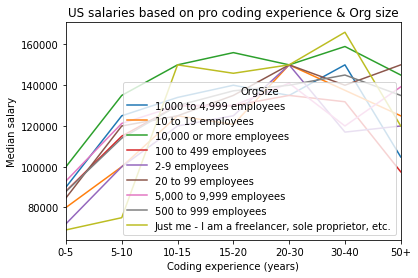

In [51]:
# US median salaries based on professional coding experience and size of organization (EW)
# Plot as a chart

# Findings: with experience, the best bet for a higher salary is to go freelance or join a company with 10k+ employees

procodeplot = procodetable.plot()

procodeplot.set_ylabel('Median salary')
procodeplot.set_title('US salaries based on pro coding experience & Org size')

procodeplot.set_xlabel('Coding experience (years)')

print(procodeplot)

In [52]:
# For comparison: maximum reported salary by organization type
procodetable.max()

OrgSize
1,000 to 4,999 employees                              150000.0
10 to 19 employees                                    150000.0
10,000 or more employees                              159000.0
100 to 499 employees                                  135000.0
2-9 employees                                         150000.0
20 to 99 employees                                    150000.0
5,000 to 9,999 employees                              141000.0
500 to 999 employees                                  145000.0
Just me - I am a freelancer, sole proprietor, etc.    166000.0
dtype: float64

             Gender  Median Salary
0            Female       100000.0
1              Male       114000.0
2  Other/Unanswered       102000.0


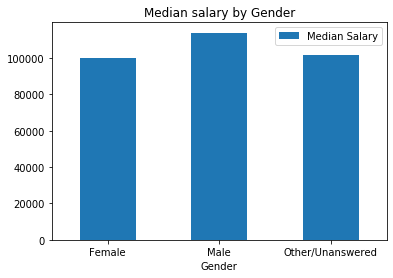

In [53]:
### Additional research question (EW)
# Review salary averages in United States, grouped by gender

# Findings: overall, males receive the highest salaries on average 

mediancomp_gender_us = US_survey.groupby('Gender')['ConvertedComp'].median().reset_index().rename(
    columns={'Gender':'Gender','ConvertedComp' : 'Median Salary'})
print(mediancomp_gender_us)

# plot as a bar chart
mediancomp_gender_us.plot.bar(x='Gender', y='Median Salary', title= 'Median salary by Gender', rot=0)

In [54]:
# Review salary averages in United States, grouped by coding experience and gender

# Findings: interestingly, at the lowest number of pro years coding (1-5), females are earning higher salaries
# This may correspond with the general push in tech companies towards hiring more female programmers

US_survey_gendercomp = US_survey['ConvertedComp'].groupby([US_survey['CodeProbinned'], US_survey['Gender']]).median().reset_index().rename(
    columns={'CodeProbinned':'Years professionally coding','Gender':'Gender','ConvertedComp' : 'Median Salary'})
print(US_survey_gendercomp)

   Years professionally coding            Gender  Median Salary
0                          0-5            Female        92500.0
1                          0-5              Male        88864.0
2                          0-5  Other/Unanswered        75000.0
3                         5-10            Female       113000.0
4                         5-10              Male       120000.0
5                         5-10  Other/Unanswered       125000.0
6                        10-15            Female       107250.0
7                        10-15              Male       134700.0
8                        10-15  Other/Unanswered       142500.0
9                        15-20            Female       120000.0
10                       15-20              Male       140000.0
11                       15-20  Other/Unanswered       150000.0
12                       20-30            Female       120000.0
13                       20-30              Male       145000.0
14                       20-30  Other/Un

In [55]:
# Generate as a pivot table and then plot

salarytable = (US_survey.pivot_table(index='CodeProbinned', columns='Gender', values='ConvertedComp',
                aggfunc='median', fill_value=0))
print(salarytable)

Gender         Female    Male  Other/Unanswered
CodeProbinned                                  
0-5             92500   88864             75000
5-10           113000  120000            125000
10-15          107250  134700            142500
15-20          120000  140000            150000
20-30          120000  145000            150000
30-40          117000  140000           1057500
50+             89000  131700            102500


Text(0, 0.5, 'Median salary')

Text(0.5, 1.0, 'Median salaries based on coding experience and gender')

Text(0.5, 0, 'Years coding professionally')

AxesSubplot(0.125,0.125;0.775x0.755)


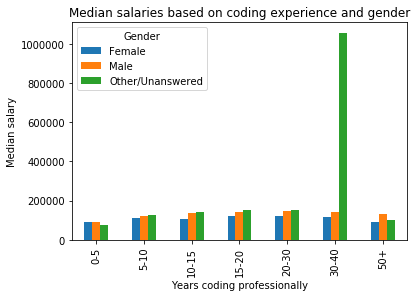

In [56]:
salaryplot = salarytable.plot.bar(stacked=False)

salaryplot.set_ylabel('Median salary')
salaryplot.set_title('Median salaries based on coding experience and gender')

salaryplot.set_xlabel('Years coding professionally')

print(salaryplot)

## Analysis of Job Factors Ranked Most Desirable by Developers

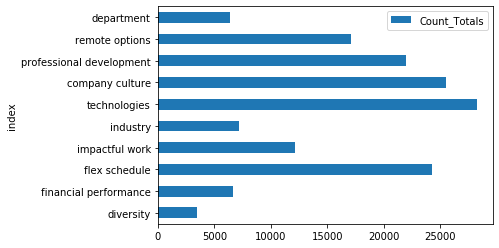

In [57]:
# Plot as horizontal bar chart 
jobfactors_bar = jobfactors_df.plot.barh(x='index', y='Count_Totals', rot=0)
jobfactors_bar

In [58]:
# rank by values
jobfactors_df.sort_values('Count_Totals', ascending=False)

,factor1,factor2,factor3,index,Count_Totals
5,20010,7752.0,442.0,technologies,28204.0
6,8571,14242.0,2688.0,company culture,25501.0
2,32,173.0,24011.0,flex schedule,24216.0
7,1013,11274.0,9682.0,professional development,21969.0
8,3149,10831.0,3083.0,remote options,17063.0
3,14,3527.0,8617.0,impactful work,12158.0
4,7206,0.0,0.0,industry,7206.0
1,6099,539.0,0.0,financial performance,6638.0
9,5177,1187.0,31.0,department,6395.0
0,95,1502.0,1873.0,diversity,3470.0


## Developers Technical Working Experience and Learning Desires

In [59]:
# Convert developer languages into lists first and then store in a new dataframe
developerDF = pd.DataFrame(columns=['LanguageWorkedWith', 'LanguageDesireNextYear'])
developerDF['LanguageWorkedWith'] = surveyDF['LanguageWorkedWith'][surveyDF['Role']=='Developer'].dropna().map(lambda x: [i.strip() for i in x.split(";")])
developerDF['LanguageDesireNextYear'] = surveyDF['LanguageDesireNextYear'][surveyDF['Role']=='Developer'].dropna().map(lambda x: [i.strip() for i in x.split(";")])

In [60]:
# Loop through the dataframe and flatten each list into a series
LanguageWorkedWith = pd.Series([item for sublist in developerDF.LanguageWorkedWith for item in sublist])
LanguageDesireNextYear = pd.Series([item for sublist in developerDF.LanguageDesireNextYear.dropna() for item in sublist])

type(LanguageWorkedWith)
type(LanguageDesireNextYear)

LanguageWorkedWith.value_counts()
LanguageDesireNextYear.value_counts()

pandas.core.series.Series

pandas.core.series.Series

JavaScript               46945
HTML/CSS                 41911
SQL                      37235
Java                     26348
Python                   24285
Bash/Shell/PowerShell    24195
C#                       21657
PHP                      17042
TypeScript               16535
C++                      13296
C                        11130
Ruby                      5923
Go                        5852
Other(s):                 5596
Swift                     4652
Kotlin                    4590
Objective-C               3615
Assembly                  3173
VBA                       2987
Scala                     2805
R                         2731
Rust                      1981
Dart                      1244
Elixir                    1064
Clojure                   1029
F#                         757
WebAssembly                745
Erlang                     622
dtype: int64

JavaScript               34102
HTML/CSS                 27352
Python                   26960
SQL                      25238
TypeScript               20457
C#                       17260
Java                     16530
Bash/Shell/PowerShell    15410
Go                       13552
Kotlin                   10435
C++                      10409
PHP                       8595
Rust                      8200
WebAssembly               6918
Swift                     6690
C                         6673
Other(s):                 5553
Ruby                      5261
Scala                     4527
R                         3914
Dart                      3334
Elixir                    3143
F#                        2892
Assembly                  2323
Clojure                   2190
Objective-C               2086
Erlang                    1646
VBA                        757
dtype: int64

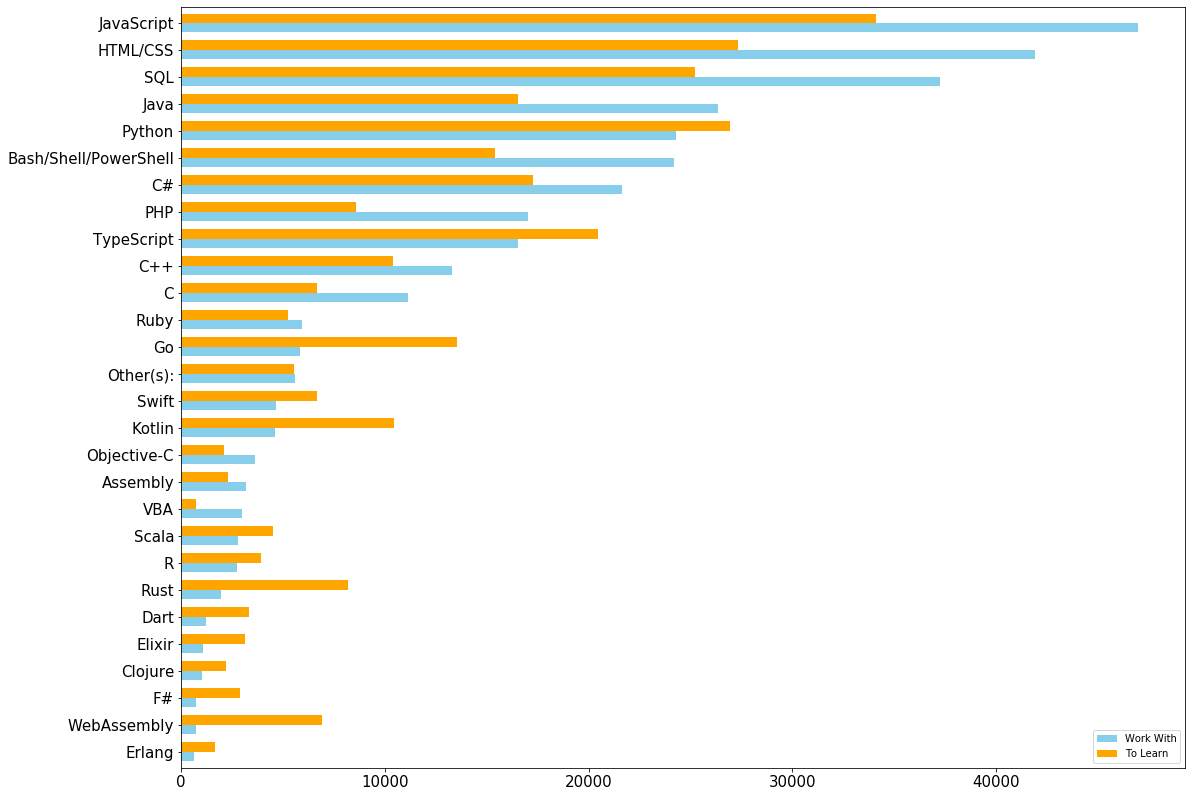

In [61]:
# Compare the languages that developers work with vs what they would like to learn next year
languageDF = pd.concat([LanguageWorkedWith.value_counts(), LanguageDesireNextYear.value_counts()], axis=1, sort=False)
languageDF.columns = ['Work With', 'To Learn']
languageDF.sort_values(ascending=True, by ='Work With').plot(kind='barh', color = {'orange','skyblue'}, figsize=(18,14), fontsize = 15, width=.7)


# Stack Overflow Jobs

## Data Import, Exploration, and Pre-Processing

In [62]:
# Import libraries/modules & other env setup
import os
import pandas as pd
import json
import seaborn as sbn
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Get current working directory
# os.getcwd()

# URLs for SO job searches
# Python Jobs: https://stackoverflow.com/jobs/feed?l=United+States&d=100&u=Miles&q=python
# R Jobs: https://stackoverflow.com/jobs/feed?l=United+States&d=100&u=Miles&q=R
    
# Util to convert rss xml to json 
# https://feed2json.org/

In [63]:
# Load json file into json dictionary
json_file = 'SO_Jobs_Python.json'
with open(json_file) as job_file:
    json_dict = json.load(job_file)

# Convert json dictionary to pandas df
json_df = pd.DataFrame.from_dict(json_dict)
json_df.reset_index(level=0, inplace=True)
json_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SO_Jobs_Python.json'

In [ ]:
# Normalize semi-structured json data in items into a dataframe
from pandas.io.json import json_normalize
job_df = json_normalize(json_df['items'])

# Parse fields to generate additional features
job_df['role'] = job_df['title'].str.replace(r'[^\w\s]+', '').str.split(' at ').str[0].str.strip()
job_df['role'] = job_df['role'].str.replace('and', '')
job_df['state'] = job_df['title'].str[-3:-1]

# Remove duplicate column
job_df = job_df.drop(columns=['summary'])

# Examine the final dataset
job_df.dtypes
job_df.head()

## Python Job Listings by Day Published or Location

In [ ]:
# Job counts by published day of the week 
pd.to_datetime(job_df['date_published']).dt.day_name().value_counts(dropna=True).sort_values(ascending=False)

pd.to_datetime(job_df['date_published']).dt.day_name().value_counts(dropna=True).sort_values(ascending=True).plot(kind='barh').xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
# Job counts by state (top 15 only)
top15_state = job_df['state'].value_counts(dropna=True).sort_values(ascending=False)[:15]
top15_state
top15_state.sort_values(ascending=True)[:15].plot(kind='barh', color='purple').xaxis.set_major_locator(MaxNLocator(integer=True))

## Python Job Roles Comparison in the Top 2 States

In [ ]:
# Import additional libraries/modules
from collections import Counter 

# Generate count of job title keywords and load into a df (python - CA)
results = Counter()
job_df['role'][job_df['state']=='CA'].str.lower().str.split().apply(results.update)
job_CA = pd.DataFrame.from_dict(results, orient='index').reset_index()
job_CA.rename(columns={'index':'role keyword', 0:'CA'}, inplace=True)

# Top 15 keywords in CA python job titles
keywords_CA = job_CA.sort_values(by='CA', ascending=False)[:15]
keywords_CA
keywords_CA.sort_values(by = 'CA', ascending=True)[:15].plot(x='role keyword', kind='barh', color='purple').xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
# Generate count of job title keywords and load into a df (python - NY)
results = Counter()
job_df['role'][job_df['state']=='NY'].str.lower().str.split().apply(results.update)
job_NY = pd.DataFrame.from_dict(results, orient='index').reset_index()
job_NY.rename(columns={'index':'role keyword', 0:'NY'}, inplace=True)

# Top 15 keywords in NY python job titles
keywords_NY = job_NY.sort_values(by='NY', ascending=False)[:15]
keywords_NY
keywords_NY.sort_values(by = 'NY', ascending=True)[:15].plot(x='role keyword', kind='barh').xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
# Compare job title keywords in CA and NY
keywords_compare = pd.merge(job_CA.sort_values(by='CA', ascending=False)[:23], job_NY.sort_values(by='NY', ascending=False)[:25], on='role keyword')
keywords_compare
keywords_compare.sort_values(by='CA', ascending=True)[:15].plot(kind='barh', x = 'role keyword').xaxis.set_major_locator(MaxNLocator(integer=True))

## R Jobs Analysis

In [ ]:
# Load json file into json dictionary
json_file_r = 'SO_Jobs_R.json'
with open(json_file_r) as job_file_r:
    json_dict_r = json.load(job_file_r)

# Convert json dictionary to pandas df
json_df_r = pd.DataFrame.from_dict(json_dict_r)
json_df_r.reset_index(level=0, inplace=True)

# Normalize semi-structured json data in items into a dataframe
from pandas.io.json import json_normalize
job_df_r = json_normalize(json_df_r['items'])

# Parse fields to generate additional features
job_df_r['role'] = job_df_r['title'].str.replace(r'[^\w\s]+', '').str.split(' at ').str[0].str.strip()
job_df_r['state'] = job_df_r['title'].str[-3:-1]

# Remove duplicate column
job_df_r.drop(columns=['summary'])

# Check the final dataset
job_df_r.head()                                                          

In [ ]:
# How many jobs were in the collection?
job_df_r.info()

# Job Postings Date Range
pd.to_datetime(job_df_r['date_published']).min()
pd.to_datetime(job_df_r['date_published']).max()   

In [ ]:
# Job counts by state (top 15 only)
top15_state_r = job_df_r['state'].value_counts(dropna=True).sort_values(ascending=False)[:15]
top15_state_r
top15_state_r.sort_values(ascending=True)[:15].plot(kind='barh', color='purple').xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
# Generate count of job title keywords and load into a df (R - All US)
r_results = Counter()
job_df_r['role'].str.lower().str.split().apply(r_results.update)
job_r = pd.DataFrame.from_dict(r_results, orient='index').reset_index()
job_r.rename(columns={'index':'role keyword', 0:'count'}, inplace=True)

# Top 10 keywords in R job titles
keywords_R = job_r.sort_values(by='count', ascending=False)[:10]
keywords_R.sort_values(by='count', ascending=True).plot(x='role keyword', kind='barh').xaxis.set_major_locator(MaxNLocator(integer=True))     

## Python Job Descriptions Analysis

In [ ]:
# Import additional libraries & modules; checkout list items from one job post
from bs4 import BeautifulSoup
job_soup = BeautifulSoup(job_df['content_html'][0], 'html.parser')
job_soup.findAll('li')

from pandas.core.common import flatten

import nltk
from nltk import sent_tokenize, word_tokenize, FreqDist, ngrams
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')

# Get NTLK english stopwords and combine with custom stopwords
stop_nltk = set(stopwords.words("english"))
stop_ext = ['skill', 'experience', 'etc', 'use', 'using', 'team', 'ability', 'least', 'work', 'working', 'knowledge', 'degree', 'related',
            'understand', 'understanding', 'field', 'equivalent', 'professional', '\'s', 'years', 'language']
stop_words = stop_nltk.union(stop_ext)
print(len(stop_nltk), len(stop_words))

In [ ]:
# Function to identify non-alphabetical characters
import re
def alpha_filter(w):
  pattern = re.compile('^[^a-z]$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [ ]:
# Get all list items from HTML <li> tags into a list of words
all_words = []
for i in range(len(job_df['content_html'])):
    job_soup = BeautifulSoup(job_df['content_html'][i], 'html.parser')
    tokenize_sent = [word_tokenize(i) for i in list(flatten(job_soup.findAll('li')))]
    #len(tokenize_sent)
    for i in range(len(tokenize_sent)):
        for w in tokenize_sent[i]:
            if w.lower() not in stop_words and alpha_filter(w) == False:
                 all_words.append(w.lower())

# Inspect the collected list of words
type(all_words) 
len(all_words)
all_words[0:20]

In [ ]:
# Lemmatize the words list and remove stop words
lem = WordNetLemmatizer()
lemmas = [lem.lemmatize(word) for word in all_words if lem.lemmatize(word) not in stop_words and word not in stop_words]

# Get frequency distribution of the lemmatized words list
fdist = FreqDist(lemmas)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency of the lemmatized words list
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:30].sort_values(ascending = True).plot(kind = 'barh', ax = ax).xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title('Frequency of the Most Common Lemmas')
ax.set_xlabel('Frequency')
plt.show()

In [ ]:
# Create a list of n-gram with NTLK (bi-gram with lemmatization)
n = 2
nGramsInDoc = []
words = []
words = [word for word in all_words if word not in stop_words]
nGrams = ngrams(lemmas, n)

for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top n-grams
counts = count_frame.sort_values('Count', ascending = False)
ax = plt.figure(figsize=(16, 10)).gca()       
counts['Count'][:40].sort_values(ascending = True).plot(kind = 'barh', ax = ax, color='teal').xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title('Frequency of the Most Common N-Grams')
ax.set_xlabel('Frequency')
plt.show()

In [ ]:
# Create a list of n-gram with NTLK (tri-gram without lemmatization)
n = 3
nGramsInDoc = []
nGrams = ngrams(words, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top n-grams
counts = count_frame.sort_values('Count', ascending = False)
ax = plt.figure(figsize=(16, 10)).gca()       
counts['Count'][:40].sort_values(ascending = True).plot(kind = 'barh', ax = ax, color='purple').xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title('Frequency of the Most Common N-Grams')
ax.set_xlabel('Frequency')
plt.show()

# Github Jobs 

### Data Import 




In [64]:
# import libraries
import urllib.request
import json

In [75]:
# get Github job search results via jobs.github.com 
# each job site URL is re-formatted to retrieve JSON formatted data 
# API uses pagination so multiple URL's needed for >50 job results
# search pulled 2/29/20 yielded 243 results

# run each Git Job URL through following code and check output
# have to run through process each time for each URL

# retrieve 1st URL 
gitjobs1_url = "https://jobs.github.com/positions.json?utf8=%E2%9C%93&description=&location=&page=1"

In [76]:
# read to string and then parse to dictionary
response = urllib.request.urlopen(gitjobs1_url)
json_string = response.read().decode('utf-8') # read to string
gitjobs_parsed_json = json.loads(json_string) # convert string to dict
print(json.dumps(gitjobs_parsed_json, sort_keys=True, indent=4)) # take a look

[
    {
        "company": "msg nexinsure ag",
        "company_logo": "https://jobs.github.com/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBc09BIiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--f8f8d65312109da41d84630483bfe70295e8d1b0/msg-nexinsure-ag-logo-l.png",
        "company_url": "https://www.nexinsure.com/",
        "created_at": "Mon Mar 16 06:40:52 UTC 2020",
        "description": "<p>Die msg nexinsure ag ist ein Tochterunternehmen der international agierenden und unabh\u00e4ngigen msg Unternehmensgruppe und ist als Beratungs- und IT-L\u00f6sungshaus f\u00fcr die Versicherungswirtschaft t\u00e4tig. Unser Team besteht aus \u00fcber 400 Mitarbeitenden, die an den Standorten Ismaning, Hamburg, Chemnitz und Passau t\u00e4tig sind.</p>\n<p>F\u00fcr den Standort Hamburg suchen wir zum n\u00e4chstm\u00f6glichen Zeitpunkt einen Last- und Performance Architekten (m/w/d)</p>\n<p><strong>Aufgaben</strong></p>\n<ul>\n<li>Betreuung und Weiterentwicklung einer Java-basierten Pl

In [77]:
# second Github URL
gitjobs2_url = "https://jobs.github.com/positions.json?utf8=%E2%9C%93&description=&location=&page=2"
# retrieve URL and parse to dict
response2 = urllib.request.urlopen(gitjobs2_url)
json_string = response2.read().decode('utf-8') # read to string
gitjobs2_parsed_json = json.loads(json_string) # convert string to dict

In [78]:
# 3rd Github URL
gitjobs3_url = "https://jobs.github.com/positions.json?utf8=%E2%9C%93&description=&location=&page=3"
# retrieve URL and parse 
response = urllib.request.urlopen(gitjobs3_url)
json_string = response.read().decode('utf-8')
gitjobs3_parsed_json = json.loads(json_string) # convert string to dict

In [79]:
# 4th Github URL
gitjobs4_url = "https://jobs.github.com/positions.json?utf8=%E2%9C%93&description=&location=&page=4"
# retrieve URL and parse to dict
response = urllib.request.urlopen(gitjobs4_url)
json_string = response.read().decode('utf-8')
gitjobs4_parsed_json = json.loads(json_string) # convert string to dict

In [80]:
# 5th (and last) Github URL
gitjobs5_url = "https://jobs.github.com/positions.json?utf8=%E2%9C%93&description=&location=&page=5"
response = urllib.request.urlopen(gitjobs5_url)
json_string = response.read().decode('utf-8')
gitjobs5_parsed_json = json.loads(json_string) # convert string to dict

In [81]:
# DATA PROCESSING FOR GITHUB JOB UNSTRUCTURED DATA
# - store each list in same MongoDB collection in database
# initialize Mongo Client
from pymongo import MongoClient
client = MongoClient('localhost',27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [82]:
# check current databases
client.list_database_names()

['admin',
 'bball',
 'config',
 'jobsdb',
 'local',
 'nomadjobsdb',
 'peopledb',
 'remotejobsdb',
 'usgs']

In [83]:
# select database and look at collections
db = client.jobsdb
#db.jobs.delete_many( {} ) # delete current documents to avoid duplication
db.list_collection_names()

['nomads', 'jobs']

In [84]:
# INSERTING GITHUB JOB DATA INTO MONGO DB
# use 'jobs' collection in jobsdb
# have to re-run for each Github jobs URL

# create jobs collection
jobscoll = db.jobs

# insert git jobs ALL to jobs collection in jobs db
jobscoll.insert_many(gitjobs_parsed_json)
jobscoll.insert_many(gitjobs2_parsed_json)
jobscoll.insert_many(gitjobs3_parsed_json)
jobscoll.insert_many(gitjobs4_parsed_json)
jobscoll.insert_many(gitjobs5_parsed_json)

# check to see how many documents in the collection
db.jobs.estimated_document_count()

526

In [85]:
# pull the documents out into variable 
jobs_listings = jobscoll.find()
# print contents of variable
for job in jobs_listings:
    print(job)

{'_id': ObjectId('5e690e440aeb82e31250094a'), 'id': 'c4676cb5-9830-4423-88cb-e53593595c0a', 'type': 'Full Time', 'url': 'https://jobs.github.com/positions/c4676cb5-9830-4423-88cb-e53593595c0a', 'created_at': 'Wed Mar 11 13:16:35 UTC 2020', 'company': 'init.at informationstechnologie GmbH\t', 'company_url': 'https://www.init.at/', 'location': 'Vienna, Austria', 'title': 'Senior Python Backend Developer (m/w/x)', 'description': '<p><strong>Sofern Du „Bestandteil“ kleiner Teams sein möchtest – bist DU bei uns richtig.</strong></p>\n<p>Wir sind init - bereits seit Anbeginn (2000) spezialisieren wir uns auf individuelle Business-Lösungen im Individual Development Segment. Unsere Projekte händeln wir in kleinen Teams mit neuesten OS-Technologien und moderner Organisationsstrukturen.</p>\n<p>Wir bieten Dir ein spannendes und modernes Arbeitsumfeld, tolle KollegInnen, finanzielle Zusatzleistungen, ein öffentlich leicht zu erreichendes Wohlfühlbüro (+3 Terrassen), sowie frischgekochtes BIO-Mitt

# Working Nomads 


### Data Import 

In [86]:
# SECOND UNSTRUCTURED DATA SOURCE
# Retrieve Working Nomads job site URL for comparison 
# URL returns JSON formatted data with no initial search option parameters 

worknomads_url = "https://www.workingnomads.co/api/exposed_jobs/"
response = urllib.request.urlopen(worknomads_url)
json_string = response.read().decode('utf-8')

In [87]:
# convert string to dictionary (have to access array with list object inside)
worknomads_parsed_json = json.loads(json_string)

In [88]:
# check format of the parsed data and take a look
type(worknomads_parsed_json)
#print(json.dumps(worknomads_parsed_json, sort_keys=True, indent=4)) # commented out due to size

list

In [89]:
# INSERTING WORKING NOMADS JOB DATA INTO MONGO DB
# create separate collection 'nomads' collection in jobsdb

# select database and look at collections
db = client.jobsdb
#db.nomads.delete_many( {} )
db.list_collection_names()

['nomads', 'jobs']

In [90]:
# create nomads collection
nomadscoll = db.nomads
# insert working nomads jobs to collection
nomadscoll.insert_many(worknomads_parsed_json)
# check to see how many documents in the collection
db.nomads.estimated_document_count()

152

In [91]:
# pull out the nomad jobs from the collection
nomadsjob_listings = nomadscoll.find()

In [92]:
# take a look
#for job in nomadsjob_listings:
    #print(job) # commented out due to size

### Data Exploration in MongoDB

In [93]:
# initial exploration using pymongo before converting to pandas
# count total number of jobs in Github jobs
db.jobs.estimated_document_count()

526

In [94]:
# count total number of jobs in Nomads jobs
db.nomads.estimated_document_count()

152

In [95]:
# how many Nomad jobs are in the USA?
db.nomads.count_documents({"location": "USA"})

118

In [96]:
# how many working nomad jobs are development jobs?
db.nomads.count_documents({"category_name": "Development"})

54

In [97]:
# how many working nomad jobs are in the USA AND a developer job?
db.nomads.count_documents({"location": "USA", "category_name": "Development"})

38

In [98]:
# how many Github jobs are Full Time?
db.jobs.count_documents({"type": "Full Time"})

507

# Github Jobs and Working Nomads

### Semi-structured Data Pre-Processing

In [99]:
# convert github job collection to Pandas dataframe
gitjobs_df = pd.DataFrame(list(db.jobs.find({})))
print(gitjobs_df[:1])

                        _id                                    id       type  \
0  5e690e440aeb82e31250094a  c4676cb5-9830-4423-88cb-e53593595c0a  Full Time   

                                                 url  \
0  https://jobs.github.com/positions/c4676cb5-983...   

                     created_at                                 company  \
0  Wed Mar 11 13:16:35 UTC 2020  init.at informationstechnologie GmbH\t   

            company_url         location  \
0  https://www.init.at/  Vienna, Austria   

                                     title  \
0  Senior Python Backend Developer (m/w/x)   

                                         description  \
0  <p><strong>Sofern Du „Bestandteil“ kleiner Tea...   

                                        how_to_apply  \
0  <p><a href="https://initat-informationstechnol...   

                                        company_logo  
0  https://jobs.github.com/rails/active_storage/b...  


In [100]:
# whittle down unnecessary columns
gitjobs_df = gitjobs_df[['type','created_at', 'company','location','title','description']]
print(gitjobs_df[:1])
len(gitjobs_df)

        type                    created_at  \
0  Full Time  Wed Mar 11 13:16:35 UTC 2020   

                                  company         location  \
0  init.at informationstechnologie GmbH\t  Vienna, Austria   

                                     title  \
0  Senior Python Backend Developer (m/w/x)   

                                         description  
0  <p><strong>Sofern Du „Bestandteil“ kleiner Tea...  


526

In [101]:
# create a dataframe that contains all Working Nomad job locations
nomadjobs_df = pd.DataFrame(list(db.nomads.find({})))
# eliminate unnecessary columns
nomadjobs_df = nomadjobs_df[['title','description', 'company_name','category_name','tags', 'location', 'pub_date']]
len(nomadjobs_df)

152

In [102]:
# check data types
# - Github jobs
gitjobs_df.dtypes

type           object
created_at     object
company        object
location       object
title          object
description    object
dtype: object

In [103]:
# - nomads
nomadjobs_df.dtypes

title            object
description      object
company_name     object
category_name    object
tags             object
location         object
pub_date         object
dtype: object

In [104]:
# possible comparison fields are title and created at / published date
print(gitjobs_df['location'].value_counts())

Berlin                         33
Remote                         32
München                        20
Eindhoven                      15
Munich, Germany                13
                               ..
Chengdu                         1
Schiedam                        1
Pasadena, CA                    1
Reno, NV or Las Vegas, NV       1
Bonn, Hannover oder München     1
Name: location, Length: 156, dtype: int64


In [105]:
# put all into lowercase and split into two columns based on the " , "
# new data frame with split value columns 
gitjobs_new = gitjobs_df["location"].str.lower().str.split(",", n = 1, expand = True)
print(gitjobs_new)

                 0         1
0           vienna   austria
1         den haag      None
2           austin     texas
3            tokyo      None
4         johnston        ri
..             ...       ...
521       new york      None
522  new york city      None
523        münchen      None
524         remote      None
525           oslo    norway

[526 rows x 2 columns]


In [106]:
# rename columns in the new DF
gitjobs_new.columns = ['city','state']
print(gitjobs_new.columns)

Index(['city', 'state'], dtype='object')


In [107]:
print(gitjobs_new)

              city     state
0           vienna   austria
1         den haag      None
2           austin     texas
3            tokyo      None
4         johnston        ri
..             ...       ...
521       new york      None
522  new york city      None
523        münchen      None
524         remote      None
525           oslo    norway

[526 rows x 2 columns]


In [108]:
# run the function on the city column again but split on white space
gitjobs_new = gitjobs_new["city"].str.split(" ", n = 1, expand = True) 
print(gitjobs_new)

            0          1
0      vienna       None
1         den       haag
2      austin       None
3       tokyo       None
4    johnston       None
..        ...        ...
521       new       york
522       new  york city
523   münchen       None
524    remote       None
525      oslo       None

[526 rows x 2 columns]


In [109]:
# rename columns again
gitjobs_new.columns = ['city','state']
print(gitjobs_new.columns)
print(gitjobs_new)

Index(['city', 'state'], dtype='object')
         city      state
0      vienna       None
1         den       haag
2      austin       None
3       tokyo       None
4    johnston       None
..        ...        ...
521       new       york
522       new  york city
523   münchen       None
524    remote       None
525      oslo       None

[526 rows x 2 columns]


In [110]:
### Data Cleaning
# - create function to clean city column back up
# note: this may erroneously 'clean' a few values (such as new orleans, santa barbara)
def clean_city(row):
    if row['city'] == 'san':
        return 'san francisco'
    if row['city'] == 'new':
        return 'new york'
    elif row['city'] == 'ny':
        return 'new york'
    elif row['city'] == 'santa':
        return 'santa monica'
    elif row['city'] == 'los':
        return 'los angeles'
    elif row['city'] == 'fort':
        return 'fort collins'
    else:
        return row['city'] 

In [111]:
# run the function on the city column 
gitjobs_new = gitjobs_new.assign(temp=gitjobs_new.apply(clean_city, axis=1))
print(gitjobs_new)

         city      state      temp
0      vienna       None    vienna
1         den       haag       den
2      austin       None    austin
3       tokyo       None     tokyo
4    johnston       None  johnston
..        ...        ...       ...
521       new       york  new york
522       new  york city  new york
523   münchen       None   münchen
524    remote       None    remote
525      oslo       None      oslo

[526 rows x 3 columns]


In [112]:
# now drop original city column and rename temp 
gitjobs_new = gitjobs_new.drop(columns=['city'])
gitjobs_new = gitjobs_new.rename(columns={"temp": "city"})
gitjobs_new['city'].head()

0      vienna
1         den
2      austin
3       tokyo
4    johnston
Name: city, dtype: object

In [113]:
# reconfirm data
print(gitjobs_new)

         state      city
0         None    vienna
1         haag       den
2         None    austin
3         None     tokyo
4         None  johnston
..         ...       ...
521       york  new york
522  york city  new york
523       None   münchen
524       None    remote
525       None      oslo

[526 rows x 2 columns]


In [114]:
### Data Cleaning
## Github jobs 

# - Create new column for 'Region'
# create function to split into regional groups
def create_region(row):
    if row['city'] == 'düsseldorf':
        return 'Europe'
    if row['city'] == 'berlin':
        return 'Europe'
    elif row['city'] == 'Munich':
        return 'Europe'
    elif row['city'] == 'münchen':
        return 'Europe'
    elif row['city'] == 'bremen':
        return 'Europe'
    elif row['city'] == 'minsk':
        return 'Europe'
    elif row['city'] == 'rotterdam':
        return 'Europe'
    elif row['city'] == 'freiburg':
        return 'Europe'
    elif row['city'] == 'fukuoka':
        return 'Asia'
    elif row['city'] == 'oslo':
        return 'Europe'
    elif row['city'] == 'singapore':
        return 'Asia'
    elif row['city'] == 'nanterre':
        return 'Europe'
    elif row['city'] == 'frankfurt':
        return 'Europe'
    elif row['city'] == 'london':
        return 'Europe'
    elif row['city'] == 'tokyo':
        return 'Asia'
    elif row['city'] == 'remote':
        return 'Remote'
    elif row['city'] == 'köln':
        return 'Europe'
    elif row['city'] != row['city']:
        return 'North America'
    else:
        return 'North America'   

In [115]:
# use 'create region' function to create new column in DF
gitjobs_new = gitjobs_new.assign(region=gitjobs_new.apply(create_region, axis=1))
# now look at the df again
print(gitjobs_new)

         state      city         region
0         None    vienna  North America
1         haag       den  North America
2         None    austin  North America
3         None     tokyo           Asia
4         None  johnston  North America
..         ...       ...            ...
521       york  new york  North America
522  york city  new york  North America
523       None   münchen         Europe
524       None    remote         Remote
525       None      oslo         Europe

[526 rows x 3 columns]


In [116]:
# go ahead and drop the state column now
gitjobs_new2 = gitjobs_new.drop(columns=['state'])
gitjobs_new2.head()

,city,region
0,vienna,North America
1,den,North America
2,austin,North America
3,tokyo,Asia
4,johnston,North America


In [117]:
# put region column back into main github jobs DF
gitjobs_region = pd.concat([gitjobs_df, gitjobs_new2], axis=1)
gitjobs_region.head()

,type,created_at,company,location,title,description,city,region
0,Full Time,Wed Mar 11 13:16:35 UTC 2020,init.at informationstechnologie GmbH\t,"Vienna, Austria",Senior Python Backend Developer (m/w/x),<p><strong>Sofern Du „Bestandteil“ kleiner Tea...,vienna,North America
1,Full Time,Wed Mar 11 08:32:50 UTC 2020,Ministerie van Justitie en Veiligheid,Den Haag,Forensisch software-engineer,<p><em>Functie­omschrijving</em></p>\n<p>Het N...,den,North America
2,Full Time,Tue Mar 10 20:04:19 UTC 2020,Advanced Solutions International,"Austin, Texas",Software Developer,<p>Advanced Solutions International (ASI) has ...,austin,North America
3,Full Time,Tue Mar 10 18:47:38 UTC 2020,Playlog Inc,Tokyo,Senior iOS Developer- Swift 5.1 and Xcode 11,<p>Playlog Inc are a digital content creation ...,tokyo,Asia
4,Full Time,Tue Mar 10 17:41:20 UTC 2020,Citizens Bank,"Johnston, RI",Senior iOS Developer,<p>We are looking for experienced iOS develope...,johnston,North America


In [118]:
### Data Cleaning
## Working Nomads jobs 

# re-familiarize with contents of 'location' entries
print(nomadjobs_df['location'])

0                         USA
1                         USA
2                         USA
3                         USA
4                    USA Only
                ...          
147                       USA
148                       USA
149                    Global
150    ANYWHERE (100% REMOTE)
151    ANYWHERE (100% REMOTE)
Name: location, Length: 152, dtype: object


In [119]:
### DATA CLEANING
# - define function
def clean_location(row):
    if row['location'] == 'Globally with meetings in Montreal and Costa Rica':
        return 'Remote'
    if row['location'] == 'ANYWHERE (100% REMOTE)':
        return 'Remote'
    elif row['location'] == 'Anywhere':
        return 'Remote'
    elif row['location'] == 'Global (Telecommute)':
        return 'Remote'
    elif row['location'] == 'Global':
        return 'Remote'
    elif row['location'] == 'North America Only':
        return 'USA'
    elif row['location'] == 'Remote, Americas':
        return 'Remote'
    else:
        return row['location'] 

In [120]:
# apply function
nomadjobs_clean = nomadjobs_df.assign(temp=nomadjobs_df.apply(clean_location, axis=1))
nomadjobs_clean = nomadjobs_clean.drop(columns=['location']) # drop original location column
nomadjobs_clean = nomadjobs_clean.rename(columns={"temp": "location"}) # rename temp column
nomadjobs_clean.head() # verify

,title,description,company_name,category_name,tags,pub_date,location
0,"Consultant, Lead Generation/Inside Sales - Spe...","<p>The Consultant, Lead Generation is responsi...",Cardinal Health,Sales,"lead generation,salesforce,social media",2020-03-10T18:25:35.794842-04:00,USA
1,Software Product Manager,"Product Management<br />\n<br />\nBurlington, ...",CallMiner,Management,"product management,customer experience,product...",2020-03-10T18:16:43.748085-04:00,USA
2,Contracts Attorney,"<p style=""font-family:Roboto, sans-serif; font...",Prime Legal,Legal,"attorney,paralegal,cloud",2020-03-10T18:13:09.530087-04:00,USA
3,Senior Fullstack Software Engineer,<h2></h2><h2></h2><h2>Senior Fullstack Softwar...,Distru,Development,"sql,shopify,elixir,postgresql,react,git,supply...",2020-03-10T18:04:01.539431-04:00,USA
4,Remote Senior Salesforce Consultant,"<p><em>Remote, full-time, up to 25% travel may...",Elevation Solutions,Consulting,"cloud,salesforce,architecture",2020-03-10T15:18:16-04:00,USA Only


### Job Listings by Region

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Count')

AxesSubplot(0.125,0.125;0.775x0.755)


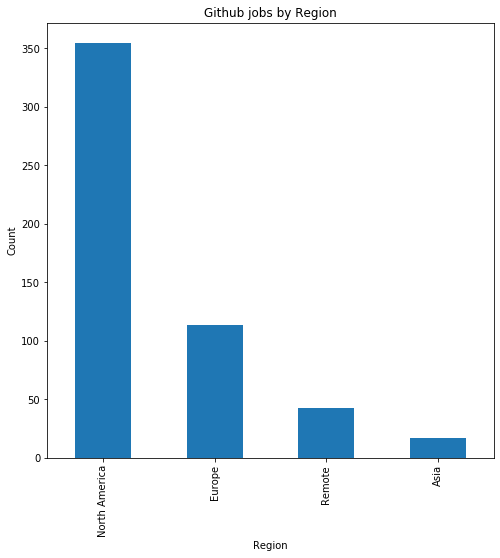

In [121]:
# Analyze breakdown of jobs by location for Github 
# Unit of measurement is 'Region' 

# Findings: jobs posted for the time period are overwhelmingly located within the United States, followed by Europe.  
region_bar = gitjobs_region['region'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Github jobs by Region")
region_bar.set_xlabel("Region")
region_bar.set_ylabel("Count")
print(region_bar)

In [122]:
# get value counts by region
# results confirm that 66% of jobs are located in North America
# jobs advertised as working 'remote' account for just 10% of the openings posted on Github jobs

print(gitjobs_new2['region'].value_counts())

North America    354
Europe           113
Remote            42
Asia              17
Name: region, dtype: int64


Text(0.5, 0, 'Location')

Text(0, 0.5, 'Count')

AxesSubplot(0.125,0.125;0.775x0.755)


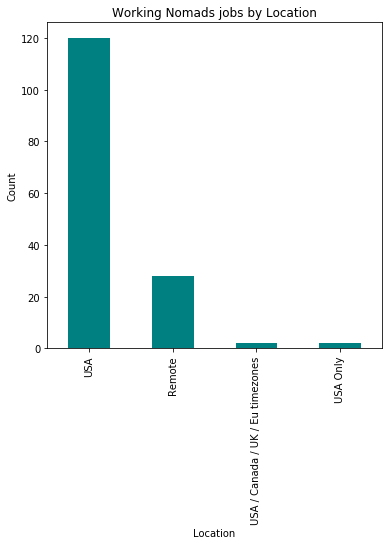

In [123]:
# Now for comparison with Working Nomads jobs
# Unit of measurement is "location"

# Findings: jobs posted for this site are also primarily located within the United States. 
# A much smaller proportion are actually nomadic jobs ;) 

location_bar = nomadjobs_clean['location'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Working Nomads jobs by Location",
                                                              color='teal')
location_bar.set_xlabel("Location")
location_bar.set_ylabel("Count")
print(location_bar)

In [124]:
# value counts by region
print(nomadjobs_clean['location'].value_counts())

USA                                 120
Remote                               28
USA / Canada / UK / Eu timezones      2
USA Only                              2
Name: location, dtype: int64


### Analysis of Titles for U.S. based positions

In [128]:
# look at job titles in North America (Github jobs)
from collections import Counter 
results = Counter()
gitjobs_region['title'][gitjobs_region['region']=='North America'].str.lower().str.split().apply(results.update)
gitjobs_namerica = pd.DataFrame.from_dict(results, orient='index').reset_index()
gitjobs_namerica.rename(columns={'index':'title keyword', 0:'Github Jobs'}, inplace=True)

# sort results in descending order
git_america_srt = gitjobs_namerica.sort_values(by='Github Jobs', ascending=False)
print(git_america_srt)

0      None
1      None
2      None
4      None
5      None
       ... 
518    None
519    None
520    None
521    None
522    None
Name: title, Length: 354, dtype: object

    title keyword  Github Jobs
3       developer          126
10       engineer          112
0          senior           99
7        software           94
30              -           33
..            ...          ...
123        django            1
122             +            1
121  资深ios程序员(远程)            1
120          tech            1
145  ontwikkelaar            1

[290 rows x 2 columns]


In [129]:
# now pull the Top 10 keywords
for letter, count in results.most_common(10):
    print('%s: %7d' % (letter, count))

developer:     126
engineer:     112
senior:      99
software:      94
-:      33
full:      29
stack:      27
web:      26
lead:      17
front:      16


In [130]:
# save Top 10 keywords
git_america_top10 = git_america_srt[:10]
git_america_top10

,title keyword,Github Jobs
3,developer,126
10,engineer,112
0,senior,99
7,software,94
30,-,33
45,full,29
46,stack,27
11,web,26
76,lead,17
79,end,16


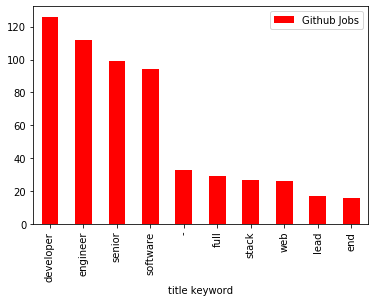

In [131]:
# plot as chart
git_america_top10.plot(x ='title keyword', y='Github Jobs', kind = 'bar', color='red')

In [132]:
# now look at Working Nomads
results = Counter()
nomadjobs_clean['title'][nomadjobs_clean['location']=='USA'].str.lower().str.split().apply(results.update)
nomads_usa = pd.DataFrame.from_dict(results, orient='index').reset_index()
nomads_usa.rename(columns={'index':'title keyword', 0:'Nomads jobs'}, inplace=True)

# sort results in descending order
nomads_usa_srt = nomads_usa.sort_values(by='Nomads jobs', ascending=False)
print(nomads_usa_srt)

0      None
1      None
2      None
3      None
5      None
       ... 
143    None
144    None
146    None
147    None
148    None
Name: title, Length: 120, dtype: object

    title keyword  Nomads jobs
12         senior           26
4               -           24
27      marketing           18
14       engineer           17
9         manager           15
..            ...          ...
102          aws)            1
101         node,            1
100        react,            1
99   (javascript,            1
126       revenue            1

[127 rows x 2 columns]


In [133]:
# save top 10
nomads_usa_top10 = nomads_usa_srt[:10]
nomads_usa_top10

,title keyword,Nomads jobs
12,senior,26
4,-,24
27,marketing,18
14,engineer,17
9,manager,15
21,developer,13
7,software,12
41,specialist,10
16,content,9
8,product,8


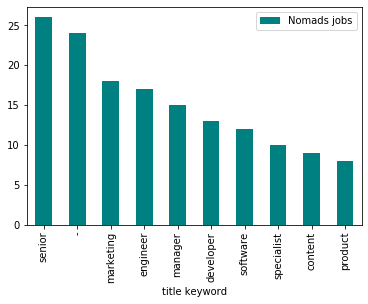

In [134]:
# plot as chart
nomads_usa_top10.plot(x ='title keyword', y='Nomads jobs', kind = 'bar', color='teal')

In [135]:
# Top 10 keywords for Working Nomads
for letter, count in results.most_common(10):
    print('%s: %7d' % (letter, count))

senior:      26
-:      24
marketing:      18
engineer:      17
manager:      15
developer:      13
software:      12
specialist:      10
content:       9
product:       8


In [136]:
# cross tabulation of Github jobs by title and region
pd.crosstab(gitjobs_region.title,gitjobs_region.region)

region,Asia,Europe,North America,Remote
title,,,,
(Associate) Expert Configuration Management (m/w/d),0,0,1,0
(Senior) IT Architekt VMware Cloud (m/w/d),0,1,0,0
(Senior) Java Developer,0,0,1,0
(Senior) PHP-Entwickler (m/w/d),0,3,0,0
(Senior) Salesforce Entwickler (m/w/d),0,3,0,0
...,...,...,...,...
Workday HCM Integration Specialist,0,0,3,0
iOS Engineer at stopwatch.com,0,0,0,2
iOS developer,0,0,0,2


In [137]:
# cross tabulation of Working Nomad USA jobs category and location
pd.crosstab(nomadjobs_clean.category_name,nomadjobs_clean.location)

location,Remote,USA,USA / Canada / UK / Eu timezones,USA Only
category_name,,,,
Administration,0,5,0,0
Consulting,0,2,0,2
Customer Success,1,2,0,0
Design,2,2,0,0
Development,16,38,0,0
Education,0,6,0,0
Finance,0,13,0,0
Human Resources,1,0,0,0
Legal,0,2,0,0


### Jobs Listings by Day of Week

In [138]:
### ADDITIONAL DATA PROCESSING 
## DATA TRANSFORMATION
# - convert 'created_at' column to datetime and save in new variable
gitjobs_region['day_posted'] = pd.to_datetime(gitjobs_region['created_at'])
print(gitjobs_region['day_posted'])

0     2020-03-11 13:16:35+00:00
1     2020-03-11 08:32:50+00:00
2     2020-03-10 20:04:19+00:00
3     2020-03-10 18:47:38+00:00
4     2020-03-10 17:41:20+00:00
                 ...           
521   2018-10-22 16:33:37+00:00
522   2018-10-22 15:56:13+00:00
523   2018-10-22 12:49:21+00:00
524   2018-10-21 23:46:24+00:00
525   2018-10-21 17:25:33+00:00
Name: day_posted, Length: 526, dtype: datetime64[ns, UTC]


In [139]:
# now convert to named days of the week 
gitjobs_region['days'] = gitjobs_region['day_posted'].dt.day_name()

In [140]:
# confirm conversion to days
print(gitjobs_region['days'])

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
521       Monday
522       Monday
523       Monday
524       Sunday
525       Sunday
Name: days, Length: 526, dtype: object


In [141]:
# confirm datetime conversion
gitjobs_region.dtypes

type                        object
created_at                  object
company                     object
location                    object
title                       object
description                 object
city                        object
region                      object
day_posted     datetime64[ns, UTC]
days                        object
dtype: object

In [142]:
# job posting count by day of the week
gitjobs_region['days'].value_counts()

Tuesday      128
Monday       109
Wednesday    102
Thursday      99
Friday        75
Saturday       7
Sunday         6
Name: days, dtype: int64

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Day of week')

AxesSubplot(0.125,0.125;0.775x0.755)


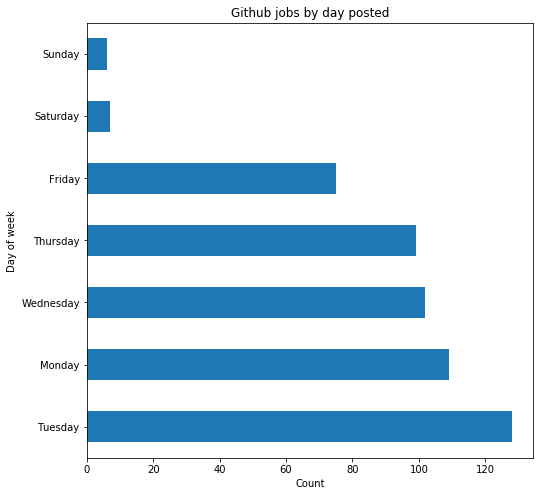

In [143]:
## Job Listings by Day of Week: Github Jobs
# Unit of measurement is "Days" 
gitdays_bar = gitjobs_region['days'].value_counts().plot(kind='barh',
                                    figsize=(8,8),
                                    title="Github jobs by day posted")
gitdays_bar.set_xlabel("Count")
gitdays_bar.set_ylabel("Day of week")
print(gitdays_bar)

In [147]:
## DATA TRANSFORMATION
# - do the same for Working Nomads collection

# convert 'pub_date' column to datetime and save in new variable
nomadjobs_clean['day_posted'] = pd.to_datetime(nomadjobs_clean['pub_date'], utc=True)
print(nomadjobs_clean['day_posted'])

0     2020-03-10 22:25:35.794842+00:00
1     2020-03-10 22:16:43.748085+00:00
2     2020-03-10 22:13:09.530087+00:00
3     2020-03-10 22:04:01.539431+00:00
4            2020-03-10 19:18:16+00:00
                    ...               
147   2020-02-18 22:31:23.489849+00:00
148   2020-02-18 21:53:07.283623+00:00
149          2020-02-18 19:07:27+00:00
150          2020-02-14 21:10:19+00:00
151          2020-02-14 21:02:56+00:00
Name: day_posted, Length: 152, dtype: datetime64[ns, UTC]


In [148]:
# pull out days of the week and save in new variable
nomadjobs_clean['days'] = nomadjobs_clean['day_posted'].dt.day_name()
print(nomadjobs_clean['days'])

0      Tuesday
1      Tuesday
2      Tuesday
3      Tuesday
4      Tuesday
        ...   
147    Tuesday
148    Tuesday
149    Tuesday
150     Friday
151     Friday
Name: days, Length: 152, dtype: object


In [149]:
# Job Listings by Day of Week: Working Nomads
nomadjobs_clean['days'].value_counts()

Wednesday    32
Tuesday      31
Friday       23
Monday       18
Sunday       18
Thursday     16
Saturday     14
Name: days, dtype: int64

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Day of week')

AxesSubplot(0.125,0.125;0.775x0.755)


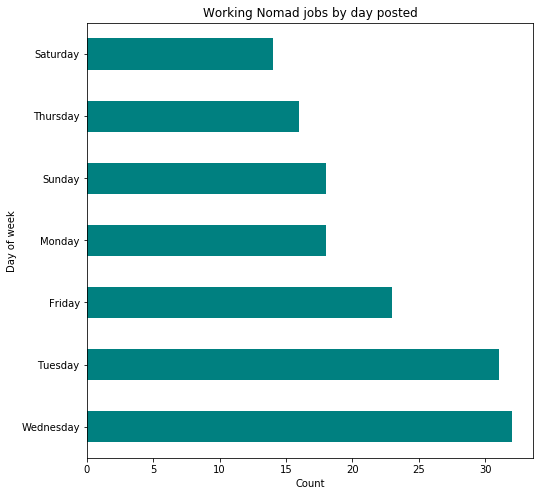

In [150]:
## Working Nomads Jobs
# Analyze the breakdown of jobs by day posted
nomaddays_bar = nomadjobs_clean['days'].value_counts().plot(kind='barh',
                                    figsize=(8,8),
                                    title="Working Nomad jobs by day posted",
                                                           color='teal')
nomaddays_bar.set_xlabel("Count")
nomaddays_bar.set_ylabel("Day of week")
print(nomaddays_bar)

# Job Descriptions

### Data Import and Export to Text File

In [ ]:
# Process to extract job description unstructured data from MongoDB and save to file
# initialize Mongo Client
from pymongo import MongoClient
client = MongoClient('localhost',27017)
client

In [ ]:
# check current databases
client.list_database_names()

In [ ]:
# select database and look at collections
db = client.jobsdb
db.list_collection_names()

In [ ]:
# Export Github jobs to Pandas dataframe
jobs_df = pd.DataFrame(list(db.jobs.find({})))
print(jobs_df[:1])

In [ ]:
# whittle down unnecessary columns
jobsdesc_df = jobs_df[['description']]
print(jobsdesc_df)

In [ ]:
## EXPORT TO TEXT FILE
# first convert to string
jobsdesc_df['description'].astype(str)
# output to text file
jobsdesc_df.to_csv('gitjobs.txt', index=False, sep=' ', header=None)

In [ ]:
# Convert filtered nomads jobs to Pandas dataframe
nomads_df = pd.DataFrame(list(db.nomads.find({})))
print(nomads_df[:1])

In [ ]:
# whittle down unnecessary columns
nomadsdesc_df = nomads_df[['description']]
print(nomadsdesc_df)

In [ ]:
## EXPORT TO TEXT FILE
# first convert to string
nomadsdesc_df['description'].astype(str)
# save to text file
nomadsdesc_df.to_csv('nomads.txt', index=False, sep=' ', header=None)

## Unstructured Data Pre-processing

In [ ]:
# Processing job description unstructured text fields from JSON-formatted data (Job searches)
# Import libraries
import nltk
import re

In [ ]:
# Process for GithubJobs
# open file containing Github job description unstructured text
text = open('gitjobs.txt')
rawgittext = text.read()
text.close()
print(rawgittext[:150])

In [ ]:
# tokenize the raw text
gittokens = nltk.word_tokenize(rawgittext)
len(gittokens)

In [ ]:
# Process for Nomad Jobs
# open the text file
text = open('nomads.txt')
rawnomadstext = text.read()
text.close()
print(rawnomadstext[:150])

In [ ]:
# tokenize Nomad jobs raw text
nomadtokens = nltk.word_tokenize(rawnomadstext)
len(nomadtokens)

In [ ]:
# put all tokens in lower case 
gitwords = [w.lower() for w in gittokens]
nomadwords = [w.lower() for w in nomadtokens]

In [ ]:
# define function that takes a word and returns true if it consists only of non-alpha characters
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [ ]:
# apply the alpha filter to Github tokens
gittoken_list = [tok for tok in gitwords if not alpha_filter(tok)]
gittoken_list[:20]

In [ ]:
# apply the alpha filter to Nomads tokens
nomadtoken_list = [tok for tok in nomadwords if not alpha_filter(tok)]
nomadtoken_list[:20]

In [ ]:
# create additional stopwords file customized for both texts
morestopwords = ["as", "/li", "'li", "nbsp", "br/", "/ul", "ul", "ll", "br", "p", "/p", "/b", "'s", "li", "/div", "div", "including", "/strong", "amp", "https", "img", "src=", "und", "en", "de", "/a", "die", "wir", "mit", "h2", "/h2", "href=", "je", "em"]

In [ ]:
# add the stopwords filter to the tokens
stoppedgittokens = [w for w in gittoken_list if not w in morestopwords]
print(len(stoppedgittokens))

In [ ]:
# add the stopwords filter to the tokens
stoppednomadtokens = [w for w in nomadtoken_list if not w in morestopwords]
print(len(stoppednomadtokens))

## Data Exploration

In [ ]:
## Define function that looks up similarity and concordance for a defined word 
def text_explore(text, word):
    text.similar(word)
    text.concordance(word)

In [ ]:
# First convert tokens to text
gittext = nltk.Text(stoppedgittokens)
nomadstext = nltk.Text(stoppednomadtokens)

## Analysis & Comparison of Job Factors 

In [ ]:
## Question:  How do the top 3 job factors compare to actual job postings?
# 1st job factor:'languages, frameworks and other technologies...'

# Github descriptions
text_explore(gittext, 'frameworks')

In [ ]:
# Nomads descriptions
text_explore(nomadstext, 'frameworks')

In [ ]:
# 2nd job factor:'company culture'
# Github descriptions
text_explore(gittext, 'culture')

In [ ]:
# Nomads descriptions
text_explore(nomadstext, 'culture')

In [ ]:
# 3rd job factor: 'flexible schedule'
# Github descriptions
text_explore(gittext, 'schedule')

In [ ]:
# Nomads descriptions
text_explore(nomadstext, 'flexible')

In [ ]:
## Wordcloud

# import library
from wordcloud import WordCloud

In [ ]:
# define wordcloud function
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
# generate wordcloud: Github jobs
wordcloud = WordCloud(stopwords={'li', 'ul', 'br', 'and', 'und', 'other', 'in', 'with', 'of', 'the', 'on', 'to', 'for', 'that', 'or', 'at', 'div', 'is', 'our', 'an', 'as', 'are', 'we', 'you', 'your', 'it'}).generate(rawgittext)
plot_wordcloud(wordcloud)

In [ ]:
# generate wordcloud: Nomads jobs
wordcloud = WordCloud(stopwords={'li', 'ul', 'br', 'and', 'other', 'in', 'your', 'we', 'with', 'of', 'the', 'on', 'to', 'for', 'that', 'or', 'at', 'div', 'is', 'our', 'an', 'as'}).generate(rawnomadstext)
plot_wordcloud(wordcloud)

In [ ]:
# Show frequency distribution of words BEFORE further processing
from nltk import FreqDist

# Github jobs
fdist = FreqDist(gittoken_list)
fdistkeys = list(fdist.keys())
fdistkeys[:20]

In [ ]:
# look at the most frequent words in the job descriptions (pre-processing)
gittopkeys = fdist.most_common(20)
for pair in gittopkeys:
    print(pair)

In [ ]:
# Nomads jobs
# Word frequencies (pre-processing)

fdist = FreqDist(nomadwords)
fdistkeys = list(fdist.keys())
fdistkeys[:20]

In [ ]:
# look at the most frequent words in the job descriptions (pre-processing)
nomadstopkeys = fdist.most_common(20)
for pair in nomadstopkeys:
    print(pair)

In [ ]:
# normalize the frequencies: get the total length of the document

# Github jobs
numwords = len(gitwords)
# divide each freq count by the total number of words and multiply by 100 to get percentages
gittopkeysnormalized = [(word,freq/numwords * 100) for (word,freq) in gittopkeys]
for pair in gittopkeysnormalized:
    print(pair)

In [ ]:
# Nomads jobs
numwords = len(nomadwords)
# divide each freq count by the total number of words and multiply by 100 to get percentages
nomadstopkeysnormalized = [(word,freq/numwords * 100) for (word,freq) in nomadstopkeys]
for pair in nomadstopkeysnormalized:
    print(pair)

In [ ]:
## FURTHER PROCESSING

# read in a stop word file
fstop = open('smart.english.stop', 'r')
stoptext = fstop.read()
fstop.close()

In [ ]:
# create the stopwords
stopwords = nltk.word_tokenize(stoptext)
print ("Display first 50 Stopwords:")
print (stopwords[:50])

In [ ]:
# include the additional stopwords list to customize for the text

mystopwords = stopwords + morestopwords # add to original stopwords list
print(len(mystopwords))
print(mystopwords)

In [ ]:
# now process the alpha filter and remove stopwords in order to re-create the frequency distributions
# Github jobs

alphagitwords = [w for w in gitwords if not alpha_filter(w)]
print(len(alphagitwords))
print(alphagitwords[:50])

In [ ]:
# Nomads jobs
alphanomadwords = [w for w in nomadwords if not alpha_filter(w)]
print(len(alphanomadwords))
print(alphanomadwords[:50])

In [ ]:
# add the stopwords filter to the alpha filtered words
stoppedgitwords = [w for w in alphagitwords if not w in mystopwords]
stoppednomadwords = [w for w in alphanomadwords if not w in mystopwords]
print(len(stoppedgitwords))
print(len(stoppednomadwords))

In [ ]:
# re-do the frequency dists using the filtered words list and normalize
gitdist = FreqDist(stoppedgitwords)
gititems = gitdist.most_common(50)
gititemsnorm = [(word,freq/numwords * 100) for (word,freq) in gititems]
for pair in gititemsnorm:
    print(pair)

In [ ]:
# Nomads jobs 
nomadsdist = FreqDist(stoppednomadwords)
nomadsitems = nomadsdist.most_common(50)
nomadsitemsnorm = [(word,freq/numwords * 100) for (word,freq) in nomadsitems]
for pair in nomadsitemsnorm:
    print(pair)

In [ ]:
## DATA EXPLORATION: BIGRAMS
# import libraries
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
# setup to process bigrams (Github jobs)
gitbifinder = BigramCollocationFinder.from_words(gitwords)
# choose to use both the non-alpha word filter and a stopwords filter
gitbifinder.apply_word_filter(alpha_filter)
gitbifinder.apply_word_filter(lambda w: w in mystopwords)

In [ ]:
# setup to process bigrams (Nomads jobs)
nomadbifinder = BigramCollocationFinder.from_words(nomadwords)
# choose to use both the non-alpha word filter and a stopwords filter
nomadbifinder.apply_word_filter(alpha_filter)
nomadbifinder.apply_word_filter(lambda w: w in mystopwords)

In [ ]:
## Bigrams for Github Jobs
# Display Top 50 by frequency score

scored = gitbifinder.score_ngrams(bigram_measures.raw_freq)
print ("Bigrams from file with top 50 frequencies")
for item in scored[:50]:
        print (item)

In [ ]:
## Bigrams for Github Jobs
# Display top 50 by Mutual Information score (PMI) 

# only use frequently occurring words in mutual information
gitbifinder.apply_freq_filter(5)
scored = gitbifinder.score_ngrams(bigram_measures.pmi)
print ("\nBigrams from file with top 50 mutual information scores")
for item in scored[:50]:
        print (item)

In [ ]:
## Bigrams for Nomads Jobs
# Display Top 50 by frequency score

scored = nomadbifinder.score_ngrams(bigram_measures.raw_freq)
print ("Bigrams from file with top 50 frequencies")
for item in scored[:50]:
        print (item)

In [ ]:
## Bigrams for Nomads Jobs
# Display top 50 by Mutual Information score (PMI) 

nomadbifinder.apply_freq_filter(5)
scored = nomadbifinder.score_ngrams(bigram_measures.pmi)
print ("\nBigrams from file with top 50 mutual information scores")
for item in scored[:50]:
        print (item)

In [ ]:
## DATA EXPLORATION: TRIGRAMS
# setup to process trigrams

trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [ ]:
## Trigrams for Github Jobs
# Display Top 50 by frequency score

gittrifinder = TrigramCollocationFinder.from_words(gitwords)
# choose to use both the non-alpha word filter and a stopwords filter
gittrifinder.apply_word_filter(alpha_filter)
gittrifinder.apply_word_filter(lambda w: w in mystopwords)
scored = gittrifinder.score_ngrams(trigram_measures.raw_freq)
print ("Trigrams from file with top 50 frequencies")
for item in scored[:50]:
        print (item)

In [ ]:
## Trigrams for Github Jobs
# Display Top 50 by PMI Score

# only use frequently occurring words in mutual information
gittrifinder.apply_freq_filter(5)
scored = gittrifinder.score_ngrams(trigram_measures.pmi)
print ("\nTrigrams from file with top 50 mutual information scores")
for item in scored[:50]:
        print (item)

In [ ]:
## Trigrams for Nomads Jobs
# Display Top 50 by frequency score

nomadtrifinder = TrigramCollocationFinder.from_words(nomadwords)
# choose to use both the non-alpha word filter and a stopwords filter
nomadtrifinder.apply_word_filter(alpha_filter)
nomadtrifinder.apply_word_filter(lambda w: w in mystopwords)
scored2 = nomadtrifinder.score_ngrams(trigram_measures.raw_freq)
print ()
print ("Trigrams from file with top 50 frequencies")
for item in scored2[:50]:
        print (item)

In [ ]:
## Trigrams for Nomads Jobs
# Display Top 50 by PMI Score

nomadtrifinder.apply_freq_filter(5)
scored2 = nomadtrifinder.score_ngrams(trigram_measures.pmi)
print ("\nTrigrams from file with top 50 mutual information scores")
for item in scored2[:50]:
        print (item)